<p style="background-color: #0055A4; font-size: 48px; font-weight: bold; color: white; padding: 20px; text-align: center;">
🕵️ Exploratory Data Analysis (EDA)
</p>


In [11]:
#Import librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from scipy.stats import pearsonr
import scipy.stats as stats
from plotly.subplots import make_subplots
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore") 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
import plotly.graph_objects as go
import plotly.express as px
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew, shapiro
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
import shap
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter
from sklearn.feature_selection import SelectKBest
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from prettytable import PrettyTable
import featuretools as ft

In [12]:
#Import data
train_df = pd.read_csv('C:/Users/Mega-Pc/Freelance/data/fraudTrain.csv', delimiter=',', encoding='utf-8',index_col=0)
test_df = pd.read_csv('C:/Users/Mega-Pc/Freelance/data/fraudTest.csv', delimiter=',', encoding='utf-8',index_col=0)



In [3]:
train_df

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
0           Jennifer      Banks      F                 561 Perry Cove   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393   
2             Edward    Sanchez      M       594 White Dale Suite 530   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038   
4              Tyler     Garcia      M               408 Bradley Rest   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city  ...      lat      long  city_pop  \
0                  Moravian Falls  ...  36.0788  -81.1781      3495   
1                          Orient  ...  48.8878 -118.2105       149   
2                      Malad City  ...  42.1808 -112.2620      4154   
3                         Boulder  ...  46.2306 -112.1138      1939   
4                        Doe Hill  ...  38.4207  -79.4629        99   
...                           ...  ...      ...       ...       ...   
1296670                     Hatch  ...  37.7175 -112.4777       258   
1296671                 Tuscarora  ...  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park  ...  32.9396 -105.8189       899   
1296673                 Manderson  ...  43.3526 -102.5411      1126   
1296674                      Sula  ...  45.8433 -113.8748       218   

                                       job         dob  \
0                Psychologist, counselling  1988-03-09   
1        Special educational needs teacher  1978-06-21   
2              Nature conservation officer  1962-01-19   
3                          Patent attorney  1967-01-12   
4           Dance movement psychotherapist  1986-03-28   
...                                    ...         ...   
1296670                       Geoscientist  1961-11-24   
1296671   Production assistant, television  1979-12-11   
1296672                    Naval architect  1967-08-30   
1296673              Volunteer coordinator  1980-08-18   
1296674           Therapist, horticultural  1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \

In [4]:
test_df

trans_date_trans_time            cc_num  \
0        2020-06-21 12:14:25  2291163933867244   
1        2020-06-21 12:14:33  3573030041201292   
2        2020-06-21 12:14:53  3598215285024754   
3        2020-06-21 12:15:15  3591919803438423   
4        2020-06-21 12:15:17  3526826139003047   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   Ashley   
3                          fraud_Haley Group        misc_pos   60.05    Brian   
4                      fraud_Johnston-Casper          travel    3.19   Nathan   
...                                      ...             ...     ...      ...   
555714                 fraud_Reilly and Sons  health_fitness   43.77  Michael   
555715                  fraud_Hoppe-Parisian       kids_pets  111.84     Jose   
555716                       fraud_Rau-Robel       kids_pets   86.88      Ann   
555717                 fraud_Breitenberg LLC          travel    7.99     Eric   
555718                     fraud_Dare-Marvin   entertainment   38.13   Samuel   

            last gender                       street          city  ...  \
0        Elliott      M            351 Darlene Green      Columbia  ...   
1       Williams      F             3638 Marsh Union       Altonah  ...   
2          Lopez      F         9333 Valentine Point      Bellmore  ...   
3       Williams      M  32941 Krystal Mill Apt. 552    Titusville  ...   
4         Massey      M     5783 Evan Roads Apt. 465      Falmouth  ...   
...          ...    ...                          ...           ...  ...   
555714     Olson      M          558 Michael Estates         Luray  ...   
555715   Vasquez      M          572 Davis Mountains  Lake Jackson  ...   
555716    Lawson      F   144 Evans Islands Apt. 683       Burbank  ...   
555717   Preston      M   7020 Doyle Stream Apt. 951          Mesa  ...   
555718      Frey      M     830 Myers Plaza Apt. 384        Edmond  ...   

            lat      long  city_pop                     job         dob  \
0       33.9659  -80.9355    333497     Mechanical engineer  1968-03-19   
1       40.3207 -110.4360       302  Sales professional, IT  1990-01-17   
2       40.6729  -73.5365     34496       Librarian, public  1970-10-21   
3       28.5697  -80.8191     54767            Set designer  1987-07-25   
4       44.2529  -85.0170      1126      Furniture designer  1955-07-06   
...         ...       ...       ...                     ...         ...   
555714  40.4931  -91.8912       519            Town planner  1966-02-13   
555715  29.0393  -95.4401     28739          Futures trader  1999-12-27   
555716  46.1966 -118.9017      3684                Musician  1981-11-29   
555717  44.6255 -116.4493       129            Cartographer  1965-12-15   
555718  35.6665  -97.4798    116001             Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   

In [5]:
train_df.head()


trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [6]:
train_df.tail()

trans_date_trans_time               cc_num  \
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city  ...      lat      long  city_pop  \
1296670                     Hatch  ...  37.7175 -112.4777       258   
1296671                 Tuscarora  ...  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park  ...  32.9396 -105.8189       899   
1296673                 Manderson  ...  43.3526 -102.5411      1126   
1296674                      Sula  ...  45.8433 -113.8748       218   

                                      job         dob  \
1296670                      Geoscientist  1961-11-24   
1296671  Production assistant, television  1979-12-11   
1296672                   Naval architect  1967-08-30   
1296673             Volunteer coordinator  1980-08-18   
1296674          Therapist, horticultural  1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \
1296670  440b587732da4dc1a6395aba5fb41669  1371816728  36.841266 -111.690765   
1296671  278000d2e0d2277d1de2f890067dcc0a  1371816739  38.906881  -78.246528   
1296672  483f52fe67fabef353d552c1e662974c  1371816752  33.619513 -105.130529   
1296673  d667cdcbadaaed3da3f4020e83591c83  1371816816  42.788940 -103.241160   
1296674  8f7c8e4ab7f25875d753b422917c98c9  1371816817  46.565983 -114.186110   

         is_fraud  
1296670         0  
1296671         0  
1296672         0  
1296673         0  
1296674         0  

[5 rows x 22 columns]

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [23]:
train_df

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
0           Jennifer      Banks      F                 561 Perry Cove   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393   
2             Edward    Sanchez      M       594 White Dale Suite 530   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038   
4              Tyler     Garcia      M               408 Bradley Rest   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city  ...      lat      long  city_pop  \
0                  Moravian Falls  ...  36.0788  -81.1781      3495   
1                          Orient  ...  48.8878 -118.2105       149   
2                      Malad City  ...  42.1808 -112.2620      4154   
3                         Boulder  ...  46.2306 -112.1138      1939   
4                        Doe Hill  ...  38.4207  -79.4629        99   
...                           ...  ...      ...       ...       ...   
1296670                     Hatch  ...  37.7175 -112.4777       258   
1296671                 Tuscarora  ...  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park  ...  32.9396 -105.8189       899   
1296673                 Manderson  ...  43.3526 -102.5411      1126   
1296674                      Sula  ...  45.8433 -113.8748       218   

                                       job         dob  \
0                Psychologist, counselling  1988-03-09   
1        Special educational needs teacher  1978-06-21   
2              Nature conservation officer  1962-01-19   
3                          Patent attorney  1967-01-12   
4           Dance movement psychotherapist  1986-03-28   
...                                    ...         ...   
1296670                       Geoscientist  1961-11-24   
1296671   Production assistant, television  1979-12-11   
1296672                    Naval architect  1967-08-30   
1296673              Volunteer coordinator  1980-08-18   
1296674           Therapist, horticultural  1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-null  i

In [9]:
# the dimensions of the dataset
print('Dimensions of the Training set:',train_df.shape)
print('Dimensions of the Test set:',test_df.shape)

Dimensions of the Training set: (1296675, 22)
Dimensions of the Test set: (555719, 22)


In [10]:
# Column names in the dataset
print('Columns of the Training set:',train_df.columns)
print('Columns of the Test set:',test_df.columns)

Columns of the Training set: Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')
Columns of the Test set: Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


In [11]:
# Statistical overview of the numerical features in the train dataset
train_df.describe().transpose()

count          mean           std           min           25%  \
cc_num      1296675.0  4.171920e+17  1.308806e+18  6.041621e+10  1.800429e+14   
amt         1296675.0  7.035104e+01  1.603160e+02  1.000000e+00  9.650000e+00   
zip         1296675.0  4.880067e+04  2.689322e+04  1.257000e+03  2.623700e+04   
lat         1296675.0  3.853762e+01  5.075808e+00  2.002710e+01  3.462050e+01   
long        1296675.0 -9.022634e+01  1.375908e+01 -1.656723e+02 -9.679800e+01   
city_pop    1296675.0  8.882444e+04  3.019564e+05  2.300000e+01  7.430000e+02   
unix_time   1296675.0  1.349244e+09  1.284128e+07  1.325376e+09  1.338751e+09   
merch_lat   1296675.0  3.853734e+01  5.109788e+00  1.902779e+01  3.473357e+01   
merch_long  1296675.0 -9.022646e+01  1.377109e+01 -1.666712e+02 -9.689728e+01   
is_fraud    1296675.0  5.788652e-03  7.586269e-02  0.000000e+00  0.000000e+00   

                     50%           75%           max  
cc_num      3.521417e+15  4.642255e+15  4.992346e+18  
amt         4.752000e+01  8.314000e+01  2.894890e+04  
zip         4.817400e+04  7.204200e+04  9.978300e+04  
lat         3.935430e+01  4.194040e+01  6.669330e+01  
long       -8.747690e+01 -8.015800e+01 -6.795030e+01  
city_pop    2.456000e+03  2.032800e+04  2.906700e+06  
unix_time   1.349250e+09  1.359385e+09  1.371817e+09  
merch_lat   3.936568e+01  4.195716e+01  6.751027e+01  
merch_long -8.743839e+01 -8.023680e+01 -6.695090e+01  
is_fraud    0.000000e+00  0.000000e+00  1.000000e+00

In [12]:
# Statistical overview of the numerical features in the test dataset
test_df.describe().transpose()

count          mean           std           min           25%  \
cc_num      555719.0  4.178387e+17  1.309837e+18  6.041621e+10  1.800429e+14   
amt         555719.0  6.939281e+01  1.567459e+02  1.000000e+00  9.630000e+00   
zip         555719.0  4.884263e+04  2.685528e+04  1.257000e+03  2.629200e+04   
lat         555719.0  3.854325e+01  5.061336e+00  2.002710e+01  3.466890e+01   
long        555719.0 -9.023133e+01  1.372178e+01 -1.656723e+02 -9.679800e+01   
city_pop    555719.0  8.822189e+04  3.003909e+05  2.300000e+01  7.410000e+02   
unix_time   555719.0  1.380679e+09  5.201104e+06  1.371817e+09  1.376029e+09   
merch_lat   555719.0  3.854280e+01  5.095829e+00  1.902742e+01  3.475530e+01   
merch_long  555719.0 -9.023138e+01  1.373307e+01 -1.666716e+02 -9.690513e+01   
is_fraud    555719.0  3.859864e-03  6.200784e-02  0.000000e+00  0.000000e+00   

                     50%           75%           max  
cc_num      3.521417e+15  4.635331e+15  4.992346e+18  
amt         4.729000e+01  8.301000e+01  2.276811e+04  
zip         4.817400e+04  7.201100e+04  9.992100e+04  
lat         3.937160e+01  4.189480e+01  6.568990e+01  
long       -8.747690e+01 -8.017520e+01 -6.795030e+01  
city_pop    2.408000e+03  1.968500e+04  2.906700e+06  
unix_time   1.380762e+09  1.385867e+09  1.388534e+09  
merch_lat   3.937659e+01  4.195416e+01  6.667930e+01  
merch_long -8.744520e+01 -8.026464e+01 -6.695203e+01  
is_fraud    0.000000e+00  0.000000e+00  1.000000e+00

In [13]:
# missing values in train dataset
missing_values = train_df.isnull().sum()
missing_percentage = train_df.isnull().sum() * 100 / len(train_df)
missing_df = pd.DataFrame({'missing_sum': missing_values, 'missing_percentage': missing_percentage})

fig = px.bar(missing_df.sort_values('missing_percentage', ascending=False), 
             x=missing_df.sort_values('missing_percentage', ascending=False).index,
             y='missing_percentage',
             title='Missing Values Percentage per Feature',
             labels={'index': 'Features', 'missing_percentage': 'Percentage of Missing Values (%)'},
             color='missing_percentage',
             color_continuous_scale='Viridis')


fig.update_layout(xaxis_tickangle=-45, 
                  xaxis_title='Features', 
                  yaxis_title='Percentage of Missing Values (%)')


fig.show()


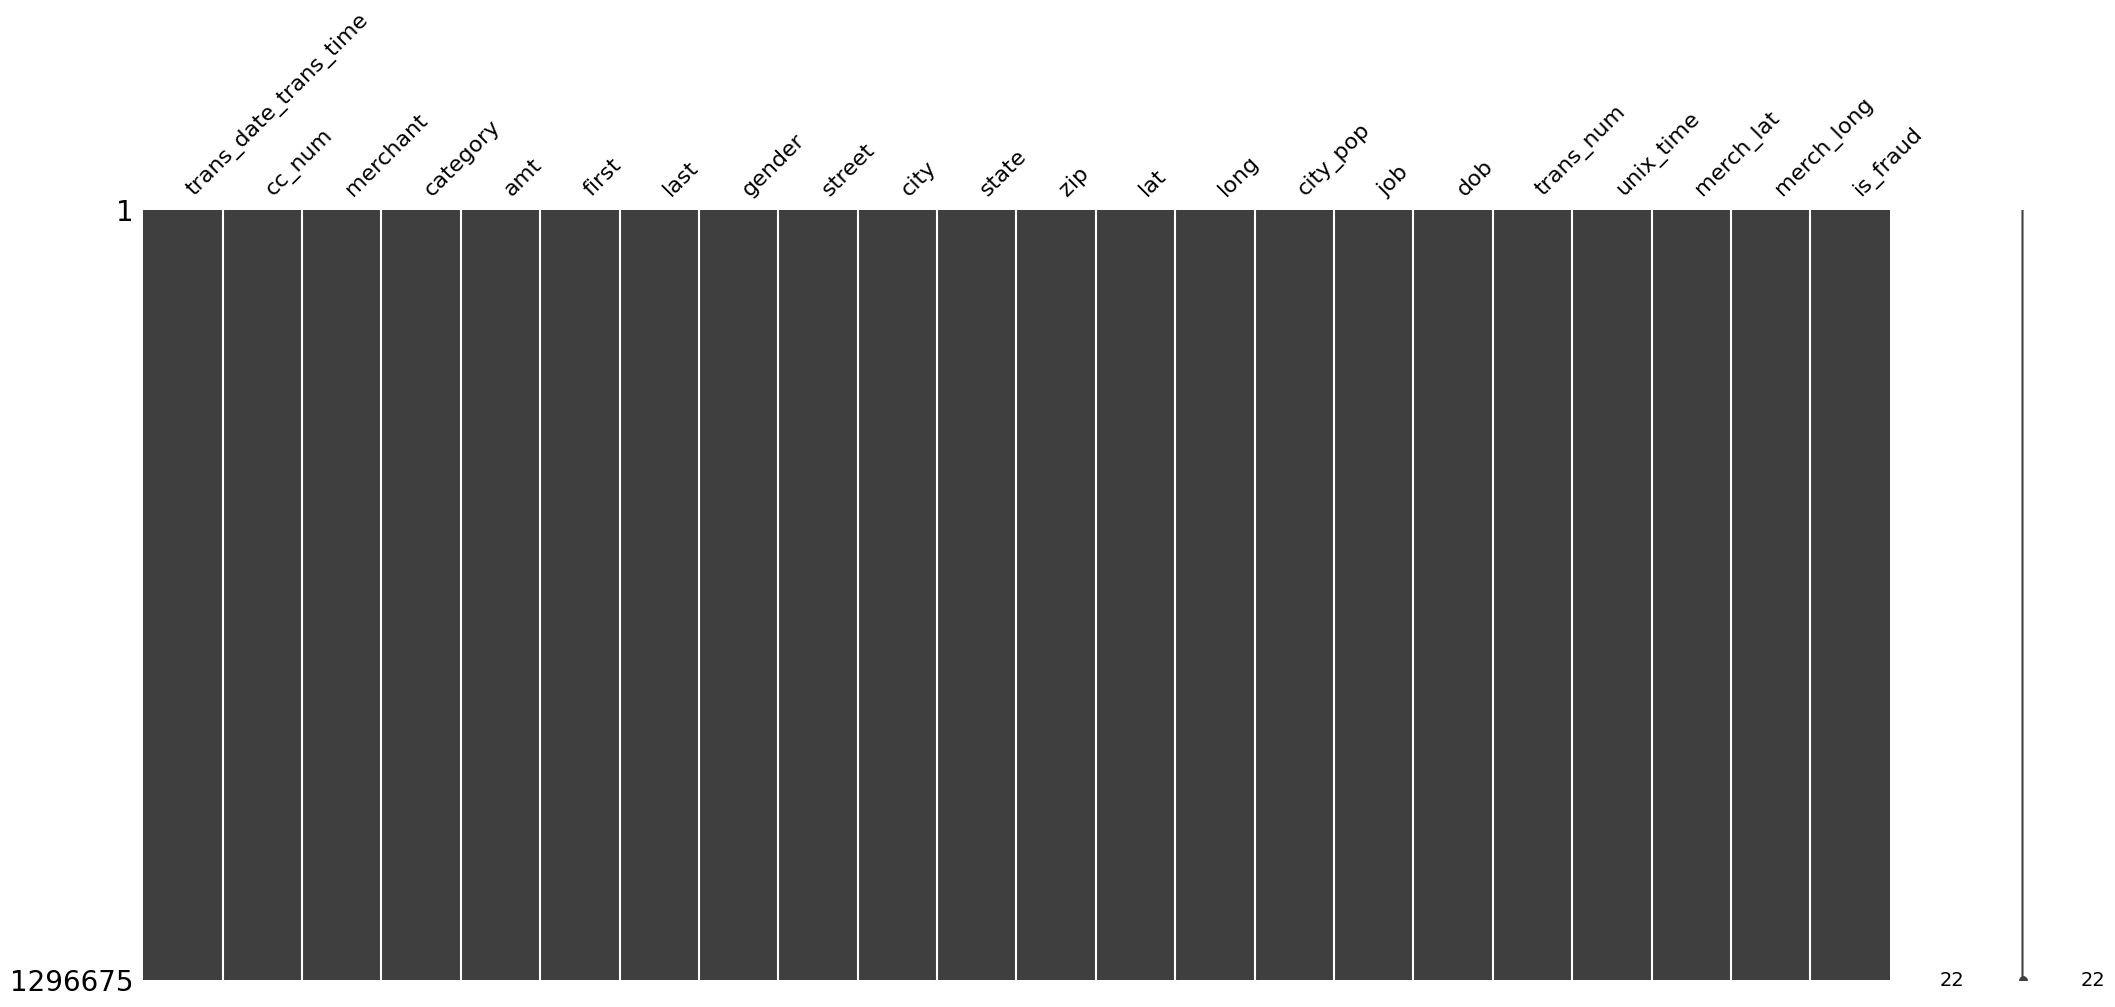

In [14]:
# A visualization that shows the presence= white and absence =black of missing values
msno.matrix(train_df)
plt.show()

In [15]:
# missing values in test dataset
missing_values = test_df.isnull().sum()
missing_percentage = test_df.isnull().sum() * 100 / len(test_df)
missing_df = pd.DataFrame({'missing_sum': missing_values, 'missing_percentage': missing_percentage})

fig = px.bar(missing_df.sort_values('missing_percentage', ascending=False), 
             x=missing_df.sort_values('missing_percentage', ascending=False).index,
             y='missing_percentage',
             title='Missing Values Percentage per Feature',
             labels={'index': 'Features', 'missing_percentage': 'Percentage of Missing Values (%)'},
             color='missing_percentage',
             color_continuous_scale='Viridis')


fig.update_layout(xaxis_tickangle=-45, 
                  xaxis_title='Features', 
                  yaxis_title='Percentage of Missing Values (%)')


fig.show()


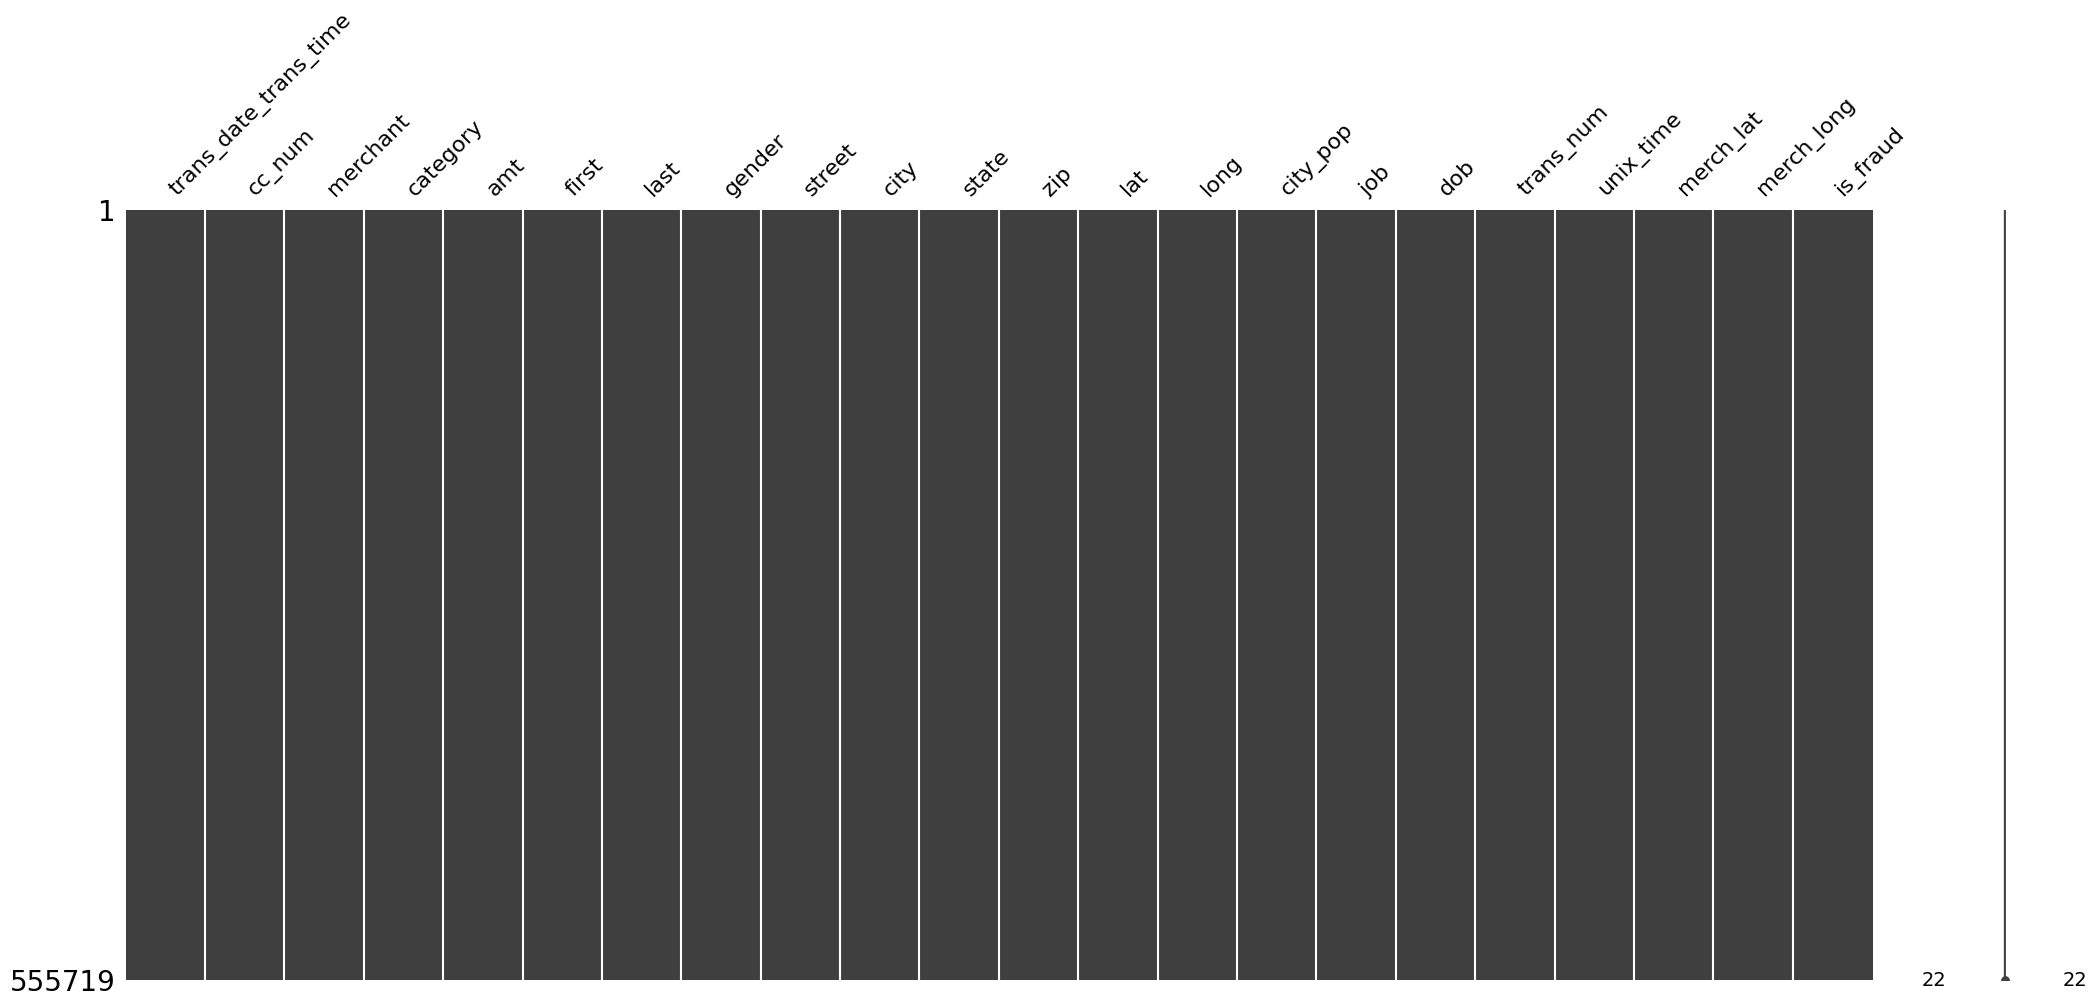

In [16]:
# A visualization that shows the presence= white and absence =black of missing values
msno.matrix(test_df)
plt.show()

## Distribution of Variable Types in Dataset

In [13]:
#train_df
target = [col for col in train_df.columns if col == 'is_fraud']
col = list(train_df.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(train_df[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

light_blue = '\033[94m'
reset_color = '\033[0m'

print(f"{light_blue}Categorical features ({len(categorical_features)}):{reset_color}", *categorical_features)
print(f"{light_blue}Target Variable ({len(target)}):{reset_color}", target)
print(f"{light_blue}Discrete features ({len(discrete_features)}):{reset_color}", *discrete_features)


Categorical features (2): gender is_fraud
Target Variable (1): ['is_fraud']
Discrete features (20): trans_date_trans_time cc_num merchant category amt first last street city state zip lat long city_pop job dob trans_num unix_time merch_lat merch_long


In [18]:
variable_types = ['Categorical', 'Discrete', 'Target']
counts = [len(categorical_features), len(discrete_features), len(target)]

# Create bar chart
fig = go.Figure(data=[go.Bar(
    x=variable_types,
    y=counts,
    text=counts,
    textposition='auto'
)])

fig.update_layout(
    title={
        'text': 'Distribution of Variable Types in the Dataset',
        'font': {'family': 'Arial', 'size': 18, 'weight': 'bold'},
        'x': 0.5,  
        'xanchor': 'center'  
    },
    xaxis_title='Variable Type',
    yaxis_title='Count',
    template='plotly_white'
)

fig.show()


In [4]:
# test_df
#train_df
target = [col for col in test_df.columns if col == 'is_fraud']
col = list(test_df.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(test_df[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

light_blue = '\033[94m'
reset_color = '\033[0m'

print(f"{light_blue}Categorical features ({len(categorical_features)}):{reset_color}", *categorical_features)
print(f"{light_blue}Target Variable ({len(target)}):{reset_color}", target)
print(f"{light_blue}Discrete features ({len(discrete_features)}):{reset_color}", *discrete_features)


Categorical features (2): gender is_fraud
Target Variable (1): ['is_fraud']
Discrete features (20): trans_date_trans_time cc_num merchant category amt first last street city state zip lat long city_pop job dob trans_num unix_time merch_lat merch_long


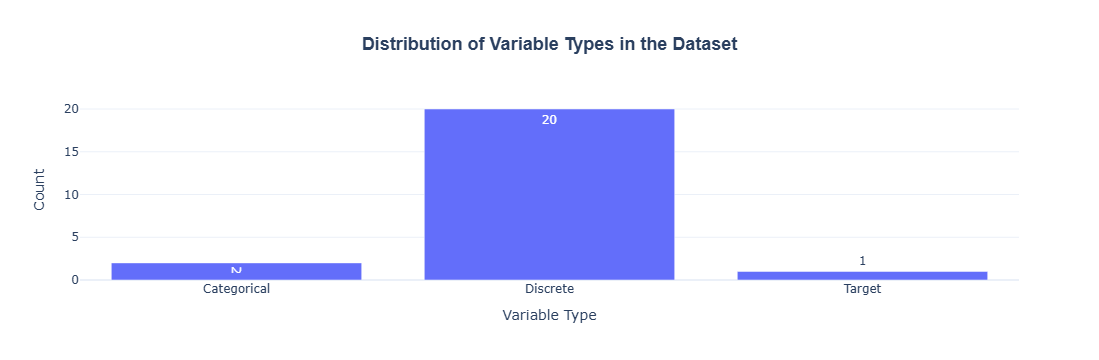

In [20]:
variable_types = ['Categorical', 'Discrete', 'Target']
counts = [len(categorical_features), len(discrete_features), len(target)]

# Create bar chart
fig = go.Figure(data=[go.Bar(
    x=variable_types,
    y=counts,
    text=counts,
    textposition='auto'
)])

fig.update_layout(
    title={
        'text': 'Distribution of Variable Types in the Dataset',
        'font': {'family': 'Arial', 'size': 18, 'weight': 'bold'},
        'x': 0.5,  
        'xanchor': 'center'  
    },
    xaxis_title='Variable Type',
    yaxis_title='Count',
    template='plotly_white'
)

fig.show()


## Unique values of discrete features

In [41]:
check_features = ['city', 'state', 'job']

def unique_counts(df, df_name):
    print(f"--- Unique values in {df_name} ---")
    for col in check_features:
        print(f"{col}: {df[col].nunique()} unique values")

unique_counts(train_df, "Train Set")


unique_counts(test_df, "Test Set")


--- Unique values in Train Set ---
city: 894 unique values
state: 51 unique values
job: 494 unique values
--- Unique values in Test Set ---
city: 849 unique values
state: 50 unique values
job: 478 unique values


## 🚶‍♂️ Overall Fraud Distribution

In [21]:
#train_df
v3_counts = train_df['is_fraud'].value_counts().reset_index()
v3_counts.columns = ['is_fraud', 'count']

# Create the pie chart
fig = px.pie(v3_counts, names='is_fraud', values='count', title='Overall Fraud Distribution', 
             color_discrete_sequence=['lightblue', 'lightcoral'])

fig.update_traces(textinfo='percent+label')
fig.update_layout(
    width=600,  
    height=600, 
    title_font_size=20,  
    legend_font_size=14 
)

fig.show()

In [22]:
#test_df
#train_df
v3_counts = test_df['is_fraud'].value_counts().reset_index()
v3_counts.columns = ['is_fraud', 'count']

# Create the pie chart
fig = px.pie(v3_counts, names='is_fraud', values='count', title='Overall Fraud Distribution', 
             color_discrete_sequence=['lightblue', 'lightcoral'])

fig.update_traces(textinfo='percent+label')
fig.update_layout(
    width=600,  
    height=600, 
    title_font_size=20,  
    legend_font_size=14 
)

fig.show()

# Fraud Distribution by :

## 📅 Date:

In [25]:
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])


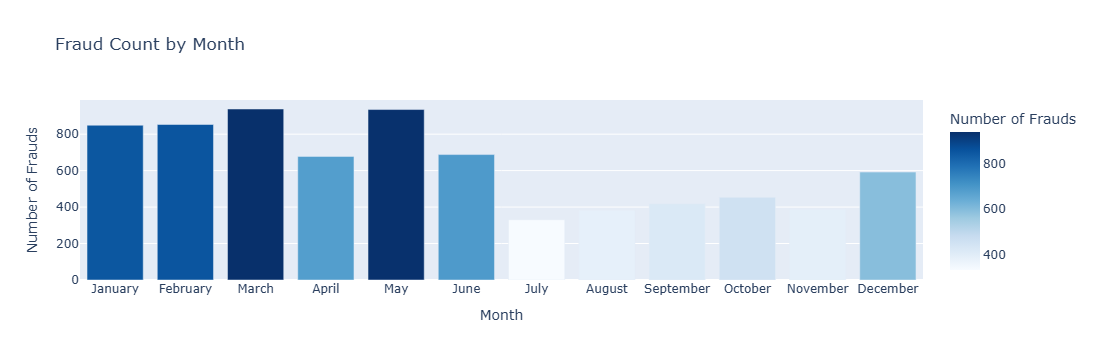

In [32]:
#train_df
train_df['date'] = train_df['trans_date_trans_time'].dt.date
train_df['month'] = train_df['trans_date_trans_time'].dt.month
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return '6AM-12PM'
    elif 12 <= hour < 18:
        return '12PM-6PM'
    elif 18 <= hour < 24:
        return '6PM-12AM'
    else:
        return '12AM-6AM'


train_df['time_of_day'] = train_df['hour'].apply(get_time_of_day)


import calendar


monthly_fraud = train_df.groupby('month')['is_fraud'].sum().reset_index()


monthly_fraud['month_name'] = monthly_fraud['month'].apply(lambda x: calendar.month_name[x])


fig = px.bar(
    monthly_fraud,
    x='month_name',
    y='is_fraud',
    title='Fraud Count by Month',
    labels={'month_name': 'Month', 'is_fraud': 'Number of Frauds'},
    color='is_fraud',
    color_continuous_scale='Blues'
)

fig.show()


####  🔍 we can conclude that has march and may have the highest fraud rate in the train dataset.

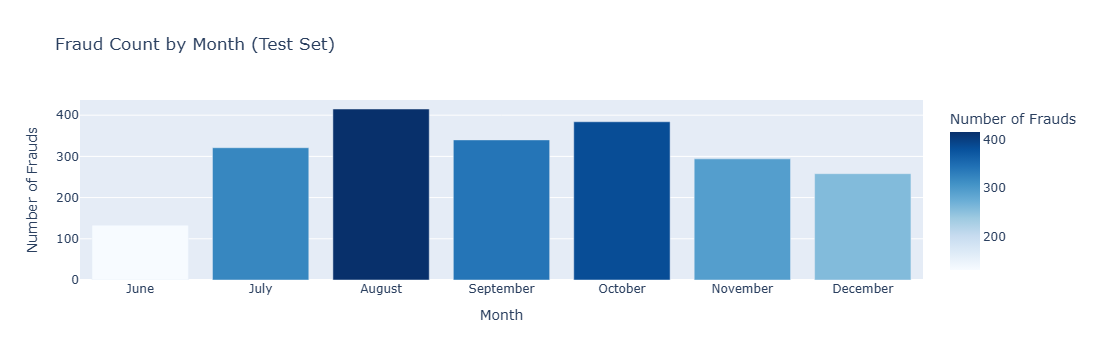

In [33]:
#test_df

test_df['date'] = test_df['trans_date_trans_time'].dt.date
test_df['month'] = test_df['trans_date_trans_time'].dt.month
test_df['hour'] = test_df['trans_date_trans_time'].dt.hour

test_df['time_of_day'] = test_df['hour'].apply(get_time_of_day)


monthly_fraud = test_df.groupby('month')['is_fraud'].sum().reset_index()
monthly_fraud['month_name'] = monthly_fraud['month'].apply(lambda x: calendar.month_name[x])

fig = px.bar(
    monthly_fraud,
    x='month_name',
    y='is_fraud',
    title='Fraud Count by Month (Test Set)',
    labels={'month_name': 'Month', 'is_fraud': 'Number of Frauds'},
    color='is_fraud',
    color_continuous_scale='Blues'
)

fig.show()


####  🔍 For the test dataset the highest fraud rates are in august then october

## ⏰ Time:

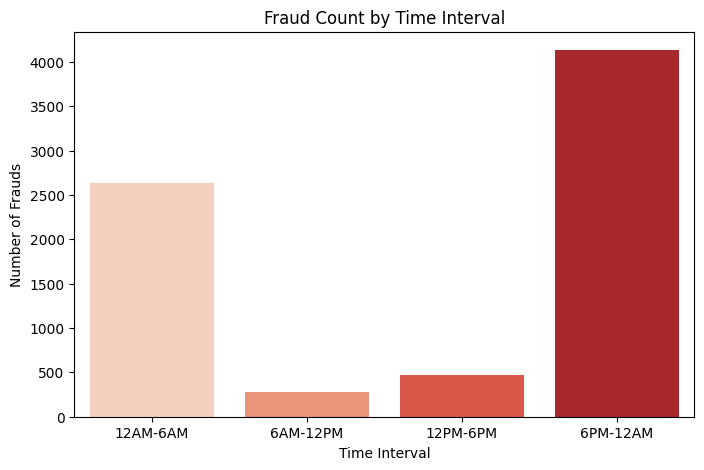

In [37]:
#train_df
time_fraud = train_df.groupby('time_of_day')['is_fraud'].sum().reindex(['12AM-6AM','6AM-12PM','12PM-6PM','6PM-12AM'])

plt.figure(figsize=(8,5))
sns.barplot(x=time_fraud.index, y=time_fraud.values, palette='Reds')
plt.title('Fraud Count by Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Number of Frauds')
plt.show()

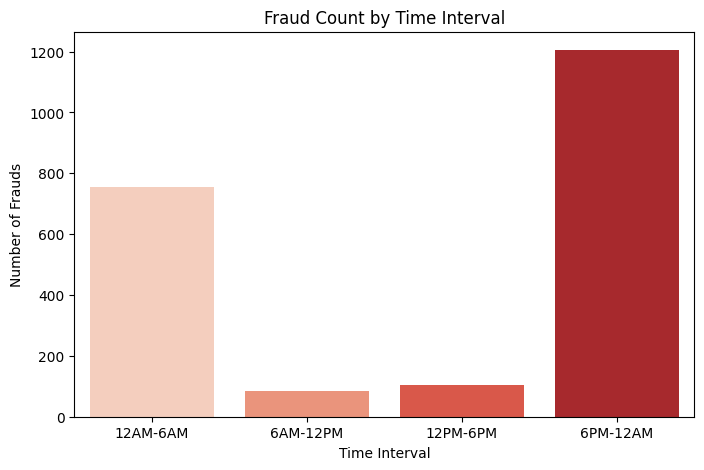

In [38]:
#test_df
time_fraud = test_df.groupby('time_of_day')['is_fraud'].sum().reindex(['12AM-6AM','6AM-12PM','12PM-6PM','6PM-12AM'])

plt.figure(figsize=(8,5))
sns.barplot(x=time_fraud.index, y=time_fraud.values, palette='Reds')
plt.title('Fraud Count by Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Number of Frauds')
plt.show()

####  🔍 For the train and test datasets most frauds occur betwwen 6pm to 12 am

## 🚻 Gender:

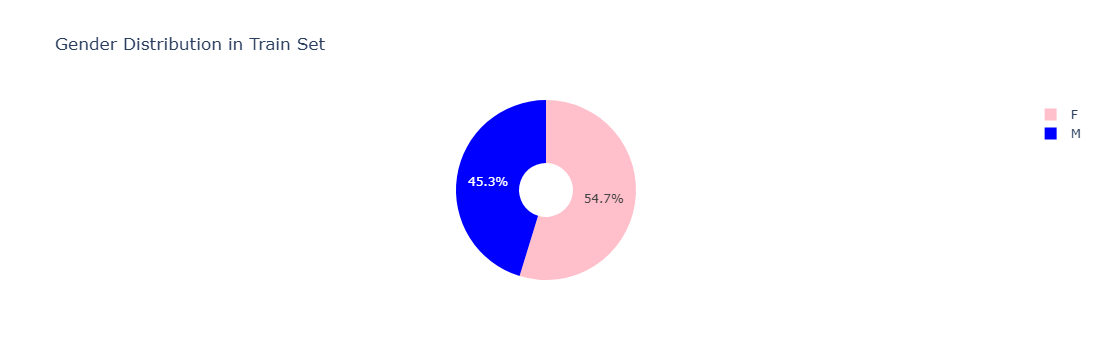

In [39]:
#train_df
gender_counts_train = train_df['gender'].value_counts().reset_index()
gender_counts_train.columns = ['gender', 'count']

# Pie chart
fig_train = px.pie(
    gender_counts_train,
    names='gender',
    values='count',
    title='Gender Distribution in Train Set',
    color='gender',
    color_discrete_map={'M':'blue','F':'pink'},
    hole=0.3 
)

fig_train.show()

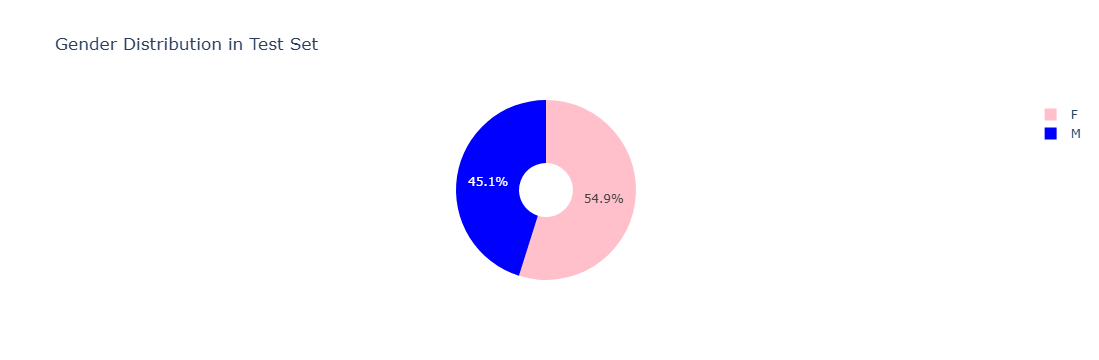

In [40]:
#test_df

gender_counts_test = test_df['gender'].value_counts().reset_index()
gender_counts_test.columns = ['gender', 'count']

fig_test = px.pie(
    gender_counts_test,
    names='gender',
    values='count',
    title='Gender Distribution in Test Set',
    color='gender',
    color_discrete_map={'M':'blue','F':'pink'},
    hole=0.3
)

fig_test.show()


####  🔍 For the train and test datasets women are more affected by fraud

## 🗓️ Date OF Birth of clients:

In [51]:
def calculate_age(dob):
    dob = pd.to_datetime(dob, errors='coerce')
    today = pd.to_datetime('today')
    return (today - dob).dt.days // 365


train_df['age'] = calculate_age(train_df['dob'])
test_df['age'] = calculate_age(test_df['dob'])


bins = [18, 30, 40, 50, 60, 70, 100]  
labels = ['18-29','30-39','40-49','50-59','60-69','70+']

train_df['age_group'] = pd.cut(train_df['age'], bins=bins, labels=labels, right=True)
test_df['age_group'] = pd.cut(test_df['age'], bins=bins, labels=labels, right=True)
# Train set
age_fraud_train = train_df.groupby('age_group')['is_fraud'].sum().reset_index()
# Test set
age_fraud_test = test_df.groupby('age_group')['is_fraud'].sum().reset_index()


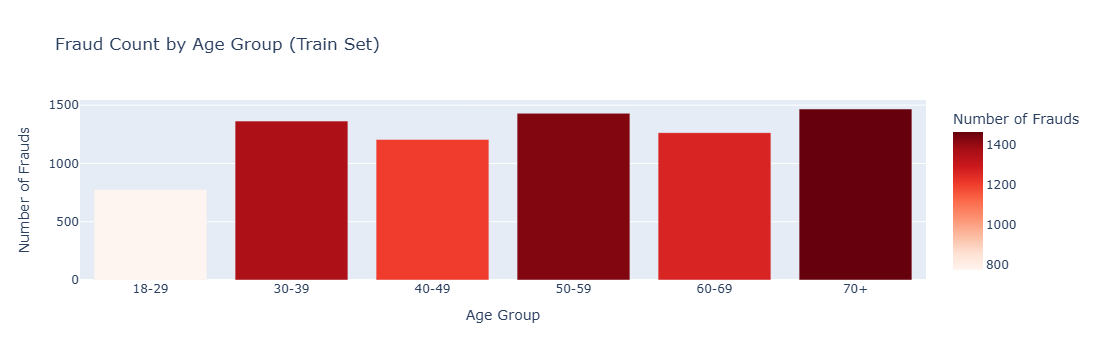

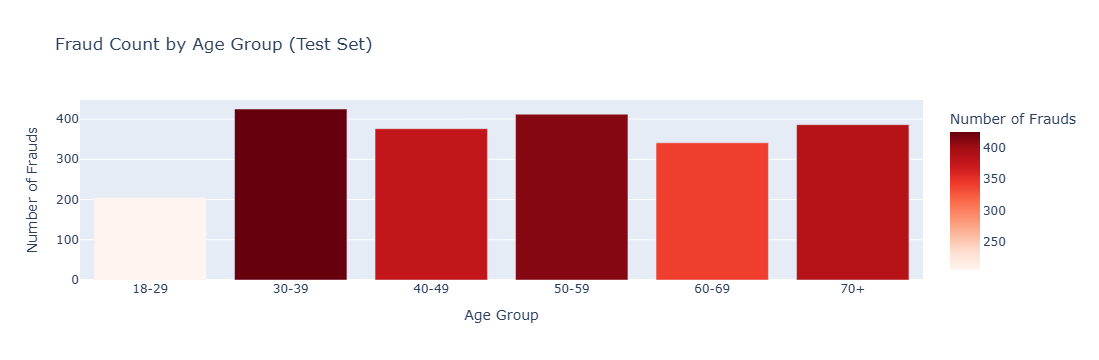

In [52]:
# Train set plot
fig_train_age = px.bar(
    age_fraud_train,
    x='age_group',
    y='is_fraud',
    title='Fraud Count by Age Group (Train Set)',
    labels={'age_group':'Age Group','is_fraud':'Number of Frauds'},
    color='is_fraud',
    color_continuous_scale='Reds'
)
fig_train_age.show()

# Test set plot
fig_test_age = px.bar(
    age_fraud_test,
    x='age_group',
    y='is_fraud',
    title='Fraud Count by Age Group (Test Set)',
    labels={'age_group':'Age Group','is_fraud':'Number of Frauds'},
    color='is_fraud',
    color_continuous_scale='Reds'
)
fig_test_age.show()


## 🏙️ City:

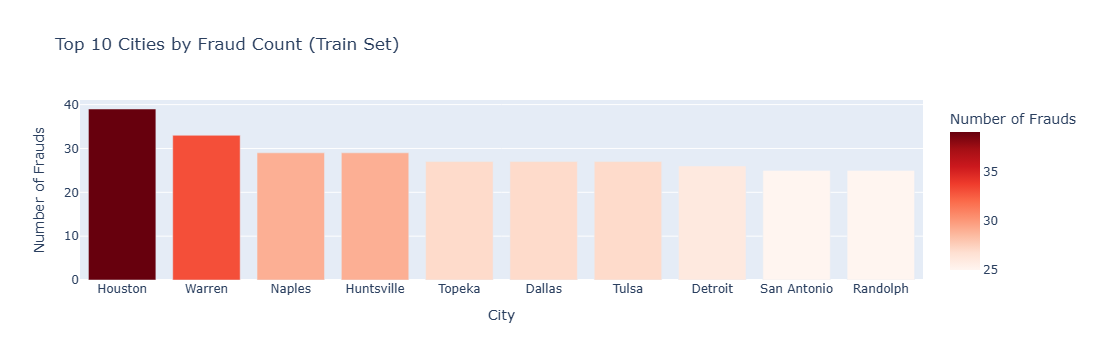

In [42]:
#train_df

city_fraud_train = train_df.groupby('city')['is_fraud'].sum().reset_index()
top10_city_fraud_train = city_fraud_train.sort_values(by='is_fraud', ascending=False).head(10)

fig_train = px.bar(
    top10_city_fraud_train,
    x='city',
    y='is_fraud',
    title='Top 10 Cities by Fraud Count (Train Set)',
    labels={'city':'City','is_fraud':'Number of Frauds'},
    color='is_fraud',
    color_continuous_scale='Reds'
)
fig_train.show()

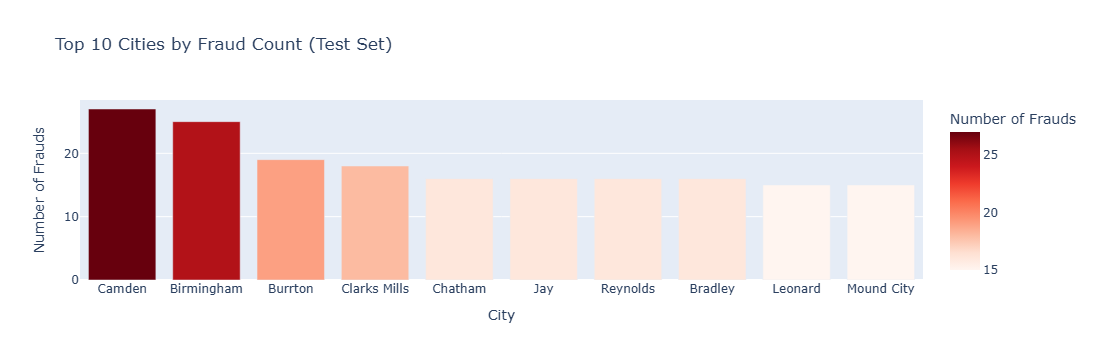

In [43]:
#test_df
city_fraud_test = test_df.groupby('city')['is_fraud'].sum().reset_index()

top10_city_fraud_test = city_fraud_test.sort_values(by='is_fraud', ascending=False).head(10)

fig_test = px.bar(
    top10_city_fraud_test,
    x='city',
    y='is_fraud',
    title='Top 10 Cities by Fraud Count (Test Set)',
    labels={'city':'City','is_fraud':'Number of Frauds'},
    color='is_fraud',
    color_continuous_scale='Reds'
)
fig_test.show()


## 💼 Job:

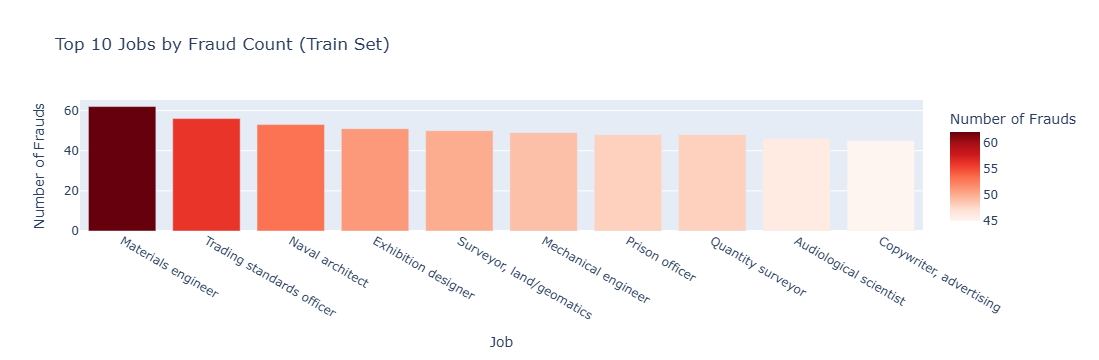

In [44]:
#train_df
job_fraud_train = train_df.groupby('job')['is_fraud'].sum().reset_index()

top10_job_fraud_train = job_fraud_train.sort_values(by='is_fraud', ascending=False).head(10)

fig_train_job = px.bar(
    top10_job_fraud_train,
    x='job',
    y='is_fraud',
    title='Top 10 Jobs by Fraud Count (Train Set)',
    labels={'job':'Job','is_fraud':'Number of Frauds'},
    color='is_fraud',
    color_continuous_scale='Reds'
)
fig_train_job.show()

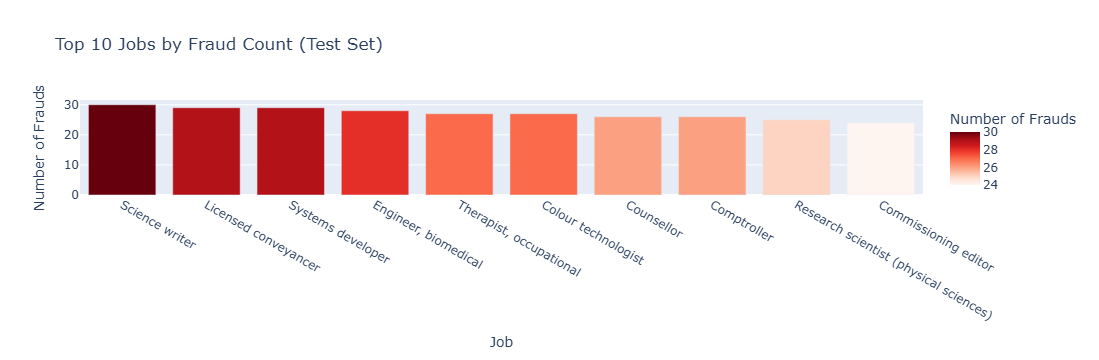

In [45]:
#test_df

job_fraud_test = test_df.groupby('job')['is_fraud'].sum().reset_index()

top10_job_fraud_test = job_fraud_test.sort_values(by='is_fraud', ascending=False).head(10)

fig_test_job = px.bar(
    top10_job_fraud_test,
    x='job',
    y='is_fraud',
    title='Top 10 Jobs by Fraud Count (Test Set)',
    labels={'job':'Job','is_fraud':'Number of Frauds'},
    color='is_fraud',
    color_continuous_scale='Reds'
)
fig_test_job.show()

## 🛍️ Merchant Category

In [53]:
category_fraud_train = train_df.groupby('category')['is_fraud'].sum().reset_index()

top10_category_fraud_train = category_fraud_train.sort_values(by='is_fraud', ascending=False).head(10)

fig_train_category = px.bar(
    top10_category_fraud_train,
    x='category',
    y='is_fraud',
    title='Top 10 Merchant Categories by Fraud Count (Train Set)',
    labels={'category':'Merchant Category','is_fraud':'Number of Frauds'},
    color='is_fraud',
    color_continuous_scale='Reds'
)
fig_train_category.show()

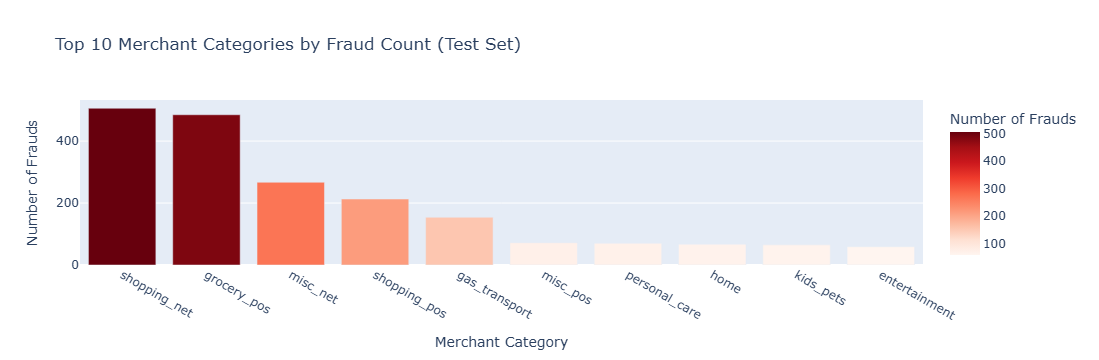

In [54]:
category_fraud_test = test_df.groupby('category')['is_fraud'].sum().reset_index()

top10_category_fraud_test = category_fraud_test.sort_values(by='is_fraud', ascending=False).head(10)

fig_test_category = px.bar(
    top10_category_fraud_test,
    x='category',
    y='is_fraud',
    title='Top 10 Merchant Categories by Fraud Count (Test Set)',
    labels={'category':'Merchant Category','is_fraud':'Number of Frauds'},
    color='is_fraud',
    color_continuous_scale='Reds'
)
fig_test_category.show()

## How many frauds clients had? :

      fraud_type  num_clients
0  Three or more          756
1            Two            6
      fraud_type  num_clients
0  Three or more          214
1            Two            4


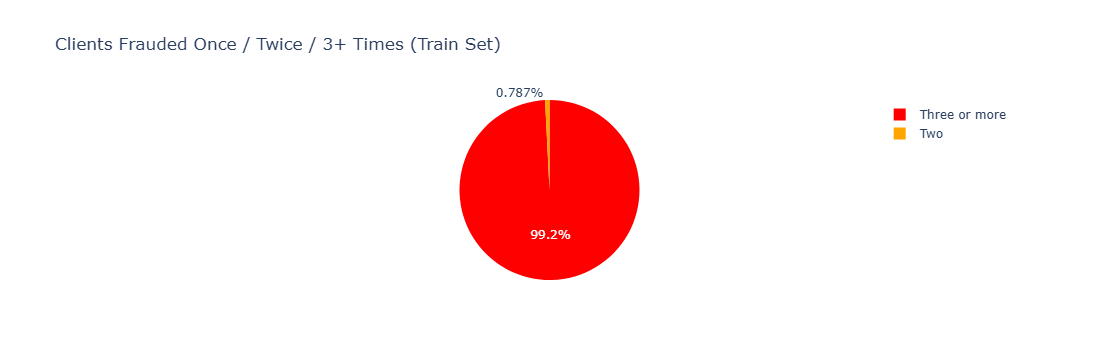

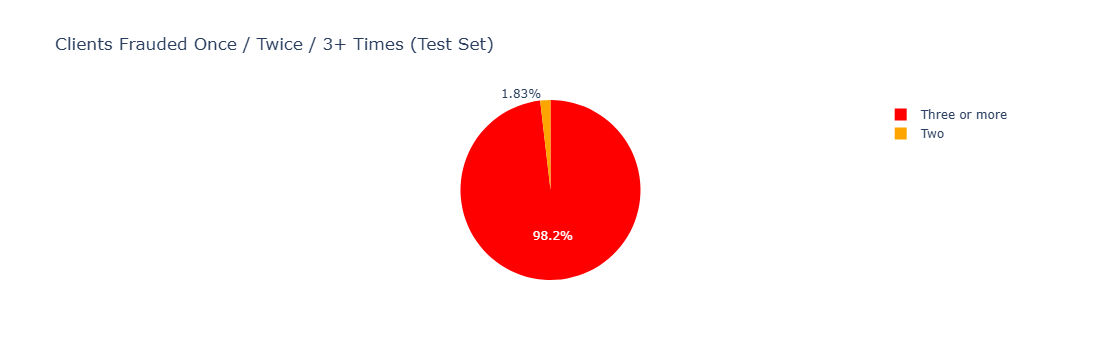

In [60]:
client_fraud_count_train = train_df[train_df['is_fraud']==1].groupby('cc_num').size().reset_index(name='fraud_count')
client_fraud_count_train['fraud_type'] = client_fraud_count_train['fraud_count'].apply(lambda x: 'Once' if x==1 else ('Two' if x==2 else 'Three or more'))
fraud_summary_train = client_fraud_count_train['fraud_type'].value_counts().reset_index()
fraud_summary_train.columns = ['fraud_type','num_clients']
print(fraud_summary_train)

client_fraud_count_test = test_df[test_df['is_fraud']==1].groupby('cc_num').size().reset_index(name='fraud_count')
client_fraud_count_test['fraud_type'] = client_fraud_count_test['fraud_count'].apply(lambda x: 'Once' if x==1 else ('Two' if x==2 else 'Three or more'))
fraud_summary_test = client_fraud_count_test['fraud_type'].value_counts().reset_index()
fraud_summary_test.columns = ['fraud_type','num_clients']
print(fraud_summary_test)

fig_train = px.pie(
    fraud_summary_train,
    names='fraud_type',
    values='num_clients',
    title='Clients Frauded Once / Twice / 3+ Times (Train Set)',
    color='fraud_type',
    color_discrete_map={'Once':'blue','Two':'orange','Three or more':'red'}
)
fig_train.show()

fig_test = px.pie(
    fraud_summary_test,
    names='fraud_type',
    values='num_clients',
    title='Clients Frauded Once / Twice / 3+ Times (Test Set)',
    color='fraud_type',
    color_discrete_map={'Once':'blue','Two':'orange','Three or more':'red'}
)
fig_test.show()


## 🔬 Univariate Analysis

### 🧮 Visualize summary statistics (mean) for fraud vs non-fraud groups

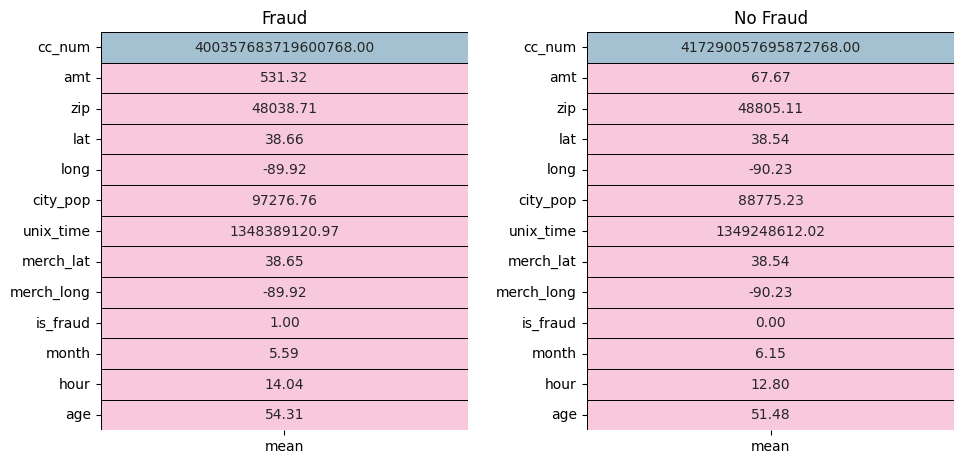

In [68]:
fraud = train_df[train_df['is_fraud'] == 1].select_dtypes(include='number').describe().T
no_fraud = train_df[train_df['is_fraud'] == 0].select_dtypes(include='number').describe().T

colors = ['#F8C8DC','#A3C1D1']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

plt.subplot(1,2,1)
sns.heatmap(fraud[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Fraud')

plt.subplot(1,2,2)
sns.heatmap(no_fraud[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('No Fraud')

fig.tight_layout(pad=2)
plt.show()

### 🚨 Detect outliers 

In [14]:
numerical_vars_filtered = [
    col for col in discrete_features 
    if col != 'cc_num' and pd.api.types.is_numeric_dtype(train_df[col])
]

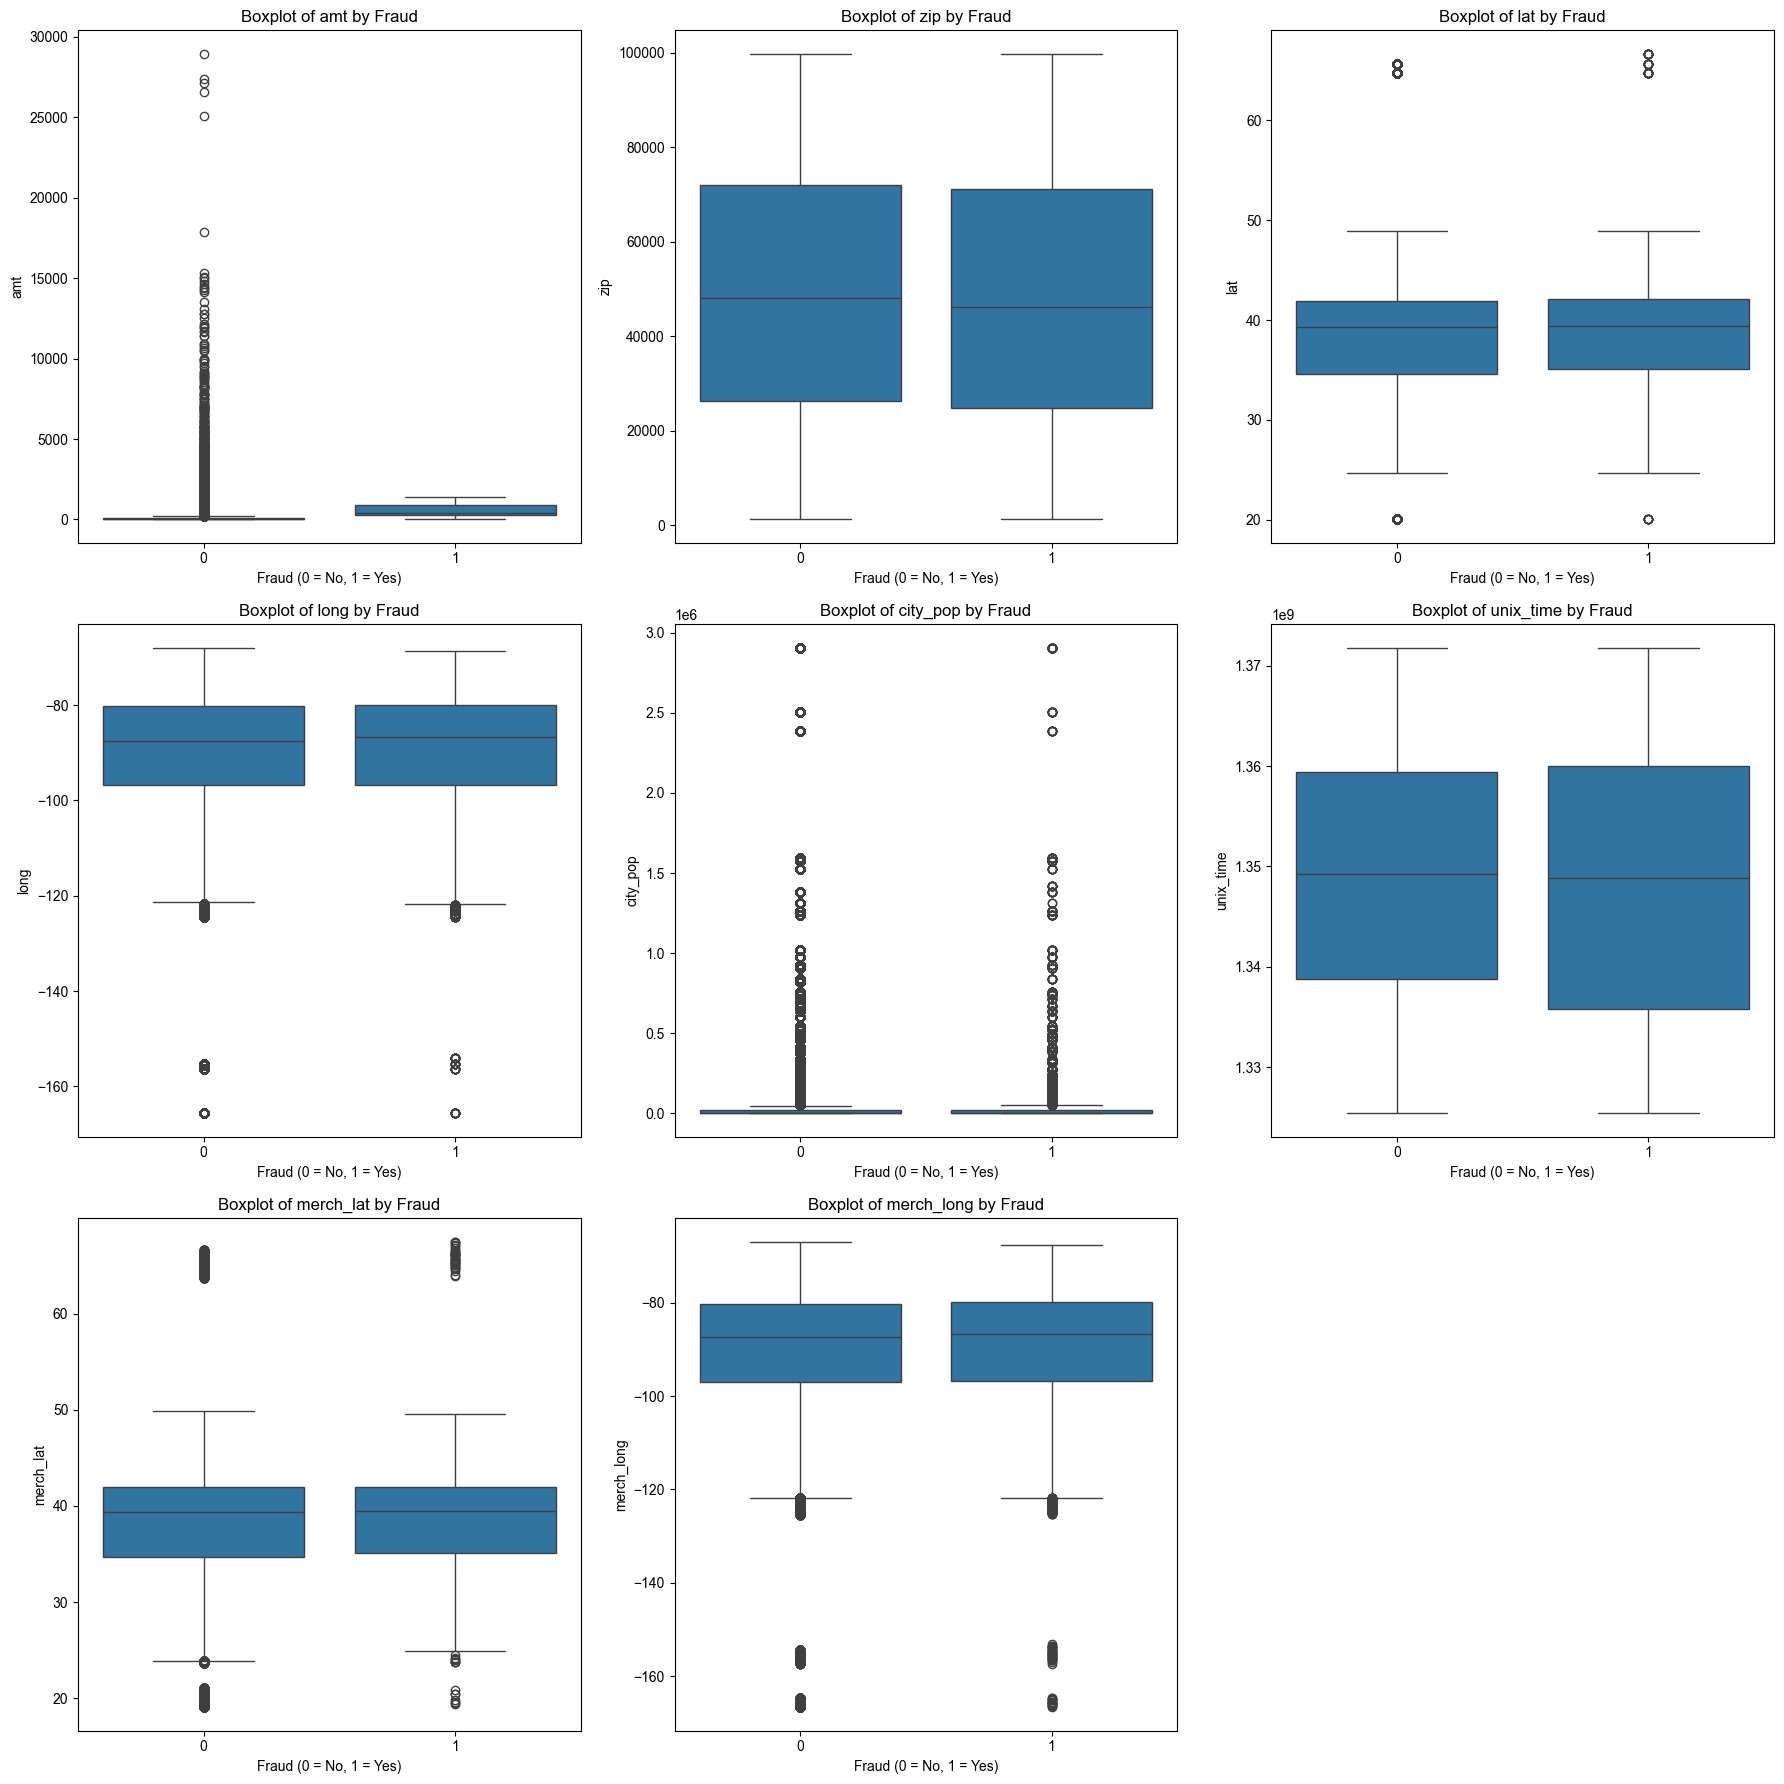

In [8]:
#train_df
num_plots = len(numerical_vars_filtered)
plots_per_row = 3
num_rows = math.ceil(num_plots / plots_per_row)

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(18, 6 * num_rows))
sns.set(style='whitegrid', palette='deep')

axes = axes.flatten()

for i, col in enumerate(numerical_vars_filtered):
    ax = axes[i]
    sns.boxplot(data=train_df, x='is_fraud', y=col, ax=ax)
    
    ax.set_title(f"Boxplot of {col} by Fraud")
    ax.set_xlabel("Fraud (0 = No, 1 = Yes)")
    ax.set_ylabel(col)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [7]:
outliers_info = []

for col in numerical_vars_filtered:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    
    outliers_info.append({
        'Feature': col,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Count': len(outliers),
        'Total Points': len(train_df)
    })

outliers_df = pd.DataFrame(outliers_info)
print(outliers_df)


      Feature   Lower Bound   Upper Bound  Outliers Count  Total Points
0         amt -1.005850e+02  1.933750e+02           67290       1296675
1         zip -4.247050e+04  1.407495e+05               0       1296675
2         lat  2.364065e+01  5.292025e+01            4679       1296675
3        long -1.217580e+02 -5.519800e+01           49922       1296675
4    city_pop -2.863450e+04  4.970550e+04          242674       1296675
5   unix_time  1.307799e+09  1.390337e+09               0       1296675
6   merch_lat  2.389818e+01  5.279255e+01            4967       1296675
7  merch_long -1.218880e+02 -5.524608e+01           41994       1296675


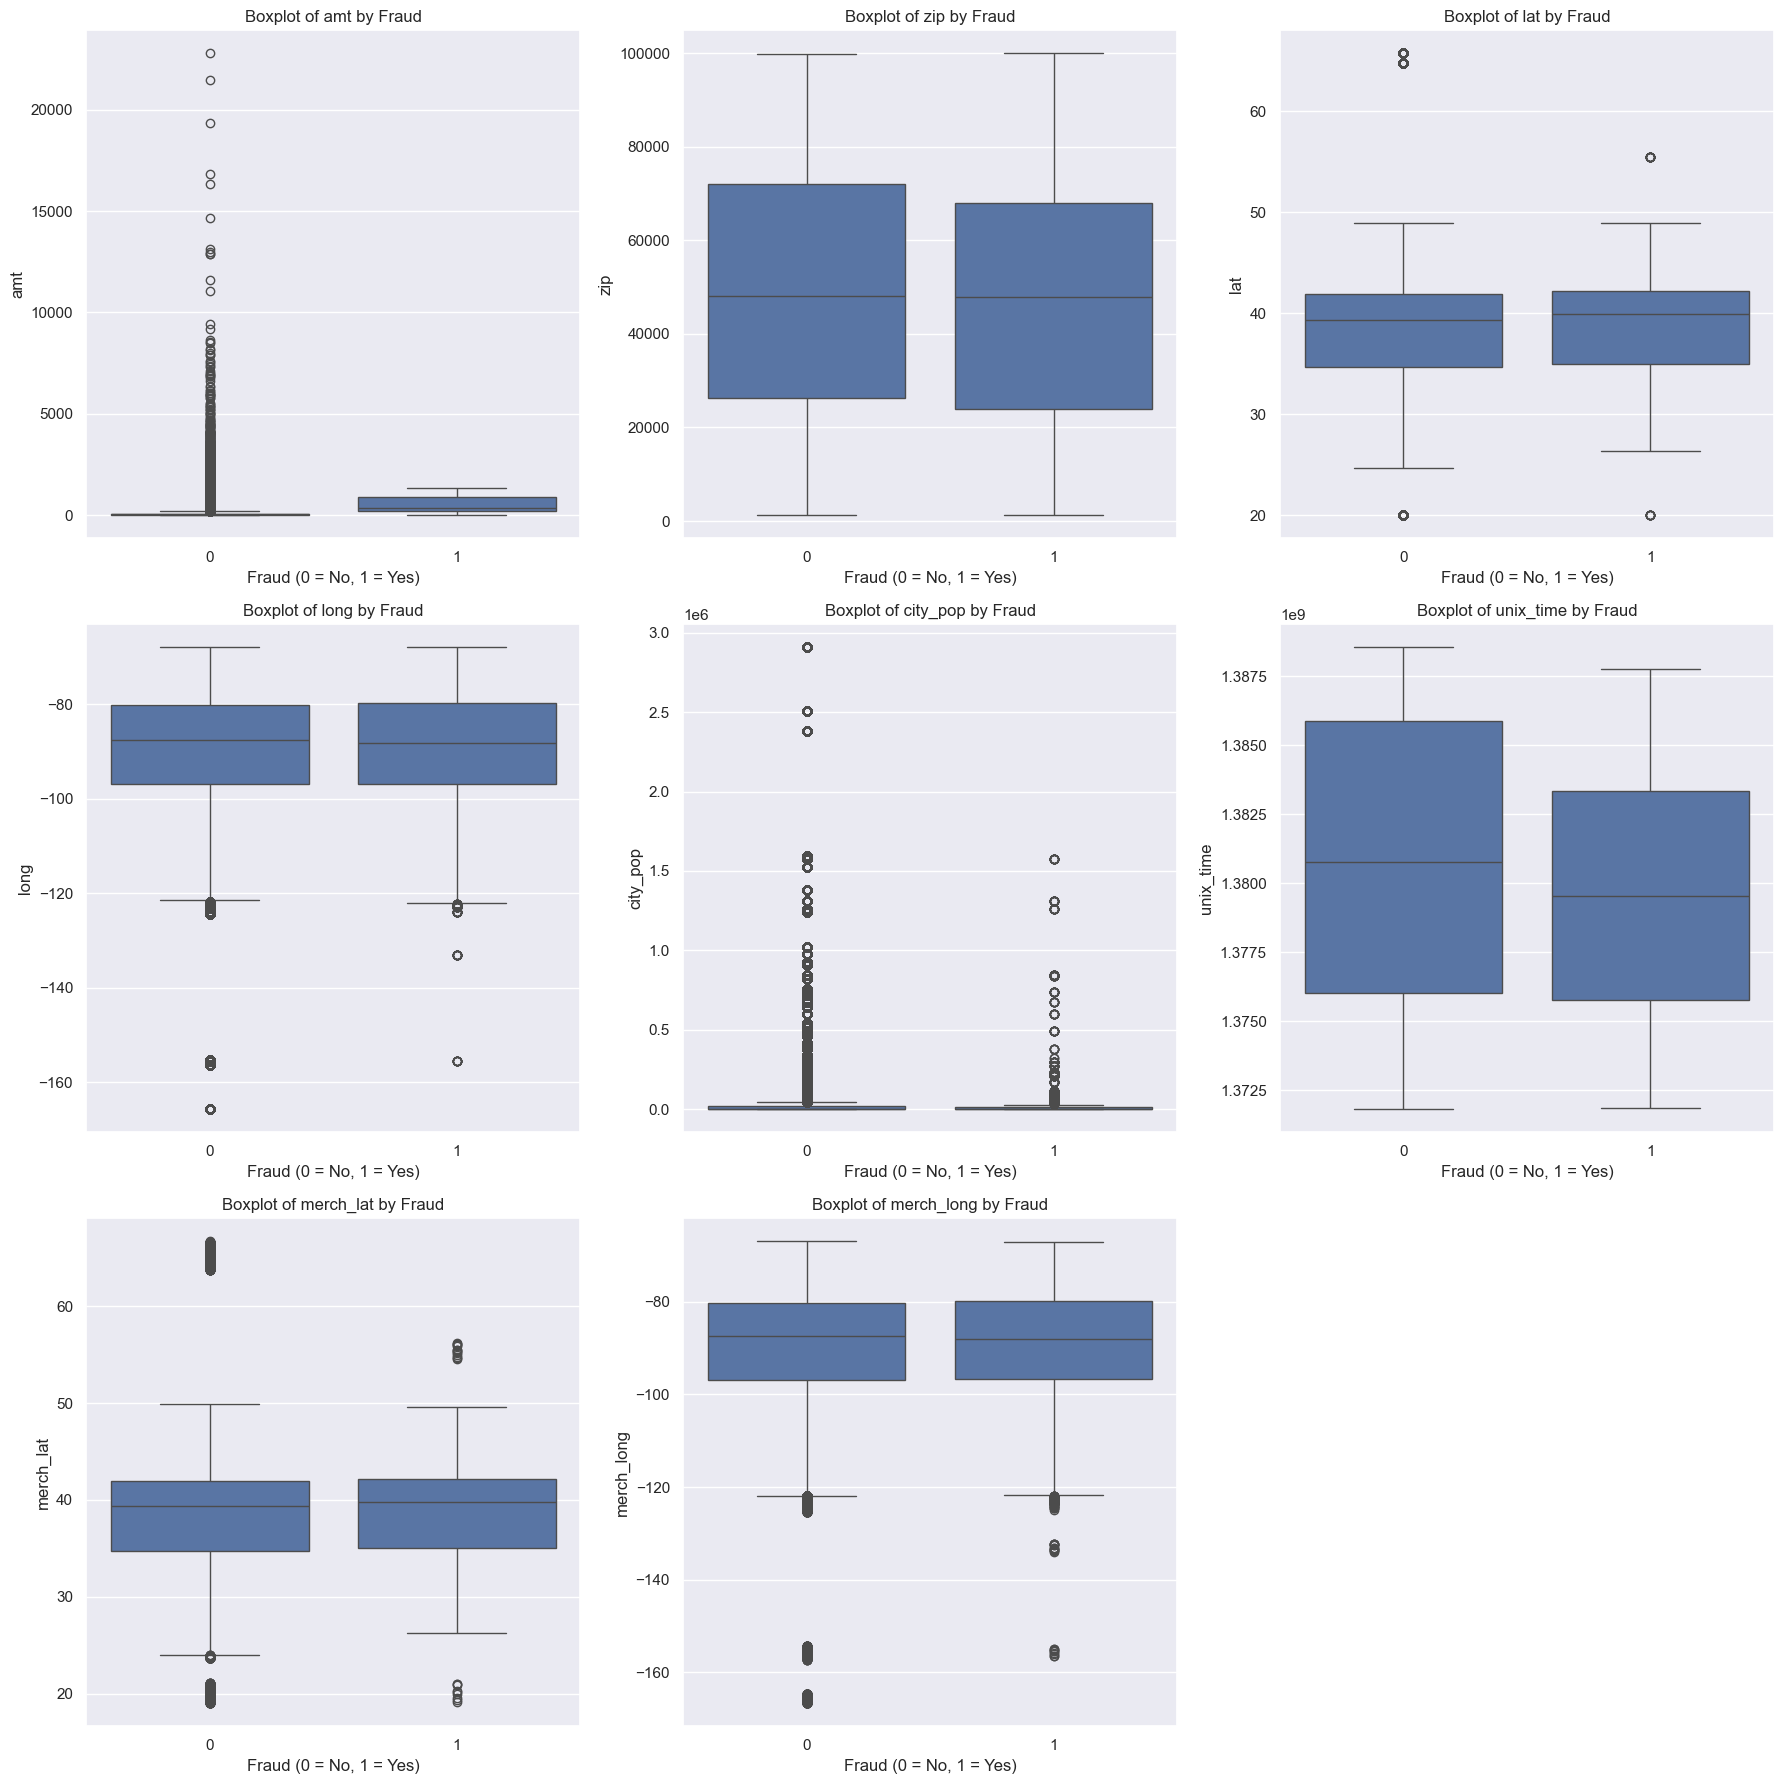

In [11]:
#test_df
numerical_vars_filtered = [
    col for col in discrete_features 
    if col != 'cc_num' and pd.api.types.is_numeric_dtype(test_df[col])
]

num_plots = len(numerical_vars_filtered)
plots_per_row = 3
num_rows = math.ceil(num_plots / plots_per_row)

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(18, 6 * num_rows))
sns.set(style='whitegrid', palette='deep')

axes = axes.flatten()

for i, col in enumerate(numerical_vars_filtered):
    ax = axes[i]
    sns.boxplot(data=test_df, x='is_fraud', y=col, ax=ax)
    
    ax.set_title(f"Boxplot of {col} by Fraud")
    ax.set_xlabel("Fraud (0 = No, 1 = Yes)")
    ax.set_ylabel(col)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [16]:
outliers_info = []

for col in numerical_vars_filtered:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = test_df[(test_df[col] < lower_bound) | (test_df[col] > upper_bound)]
    
    outliers_info.append({
        'Feature': col,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Count': len(outliers),
        'Total Points': len(train_df)
    })

outliers_df = pd.DataFrame(outliers_info)
print(outliers_df)


      Feature   Lower Bound   Upper Bound  Outliers Count  Total Points
0         amt -1.005850e+02  1.933750e+02           27673       1296675
1         zip -4.247050e+04  1.407495e+05               0       1296675
2         lat  2.364065e+01  5.292025e+01            1933       1296675
3        long -1.217580e+02 -5.519800e+01           21104       1296675
4    city_pop -2.863450e+04  4.970550e+04          103517       1296675
5   unix_time  1.307799e+09  1.390337e+09               0       1296675
6   merch_lat  2.389818e+01  5.279255e+01            2065       1296675
7  merch_long -1.218880e+02 -5.524608e+01           17819       1296675


## 📊 Q-Q plot to see if the data follows a normal distribution

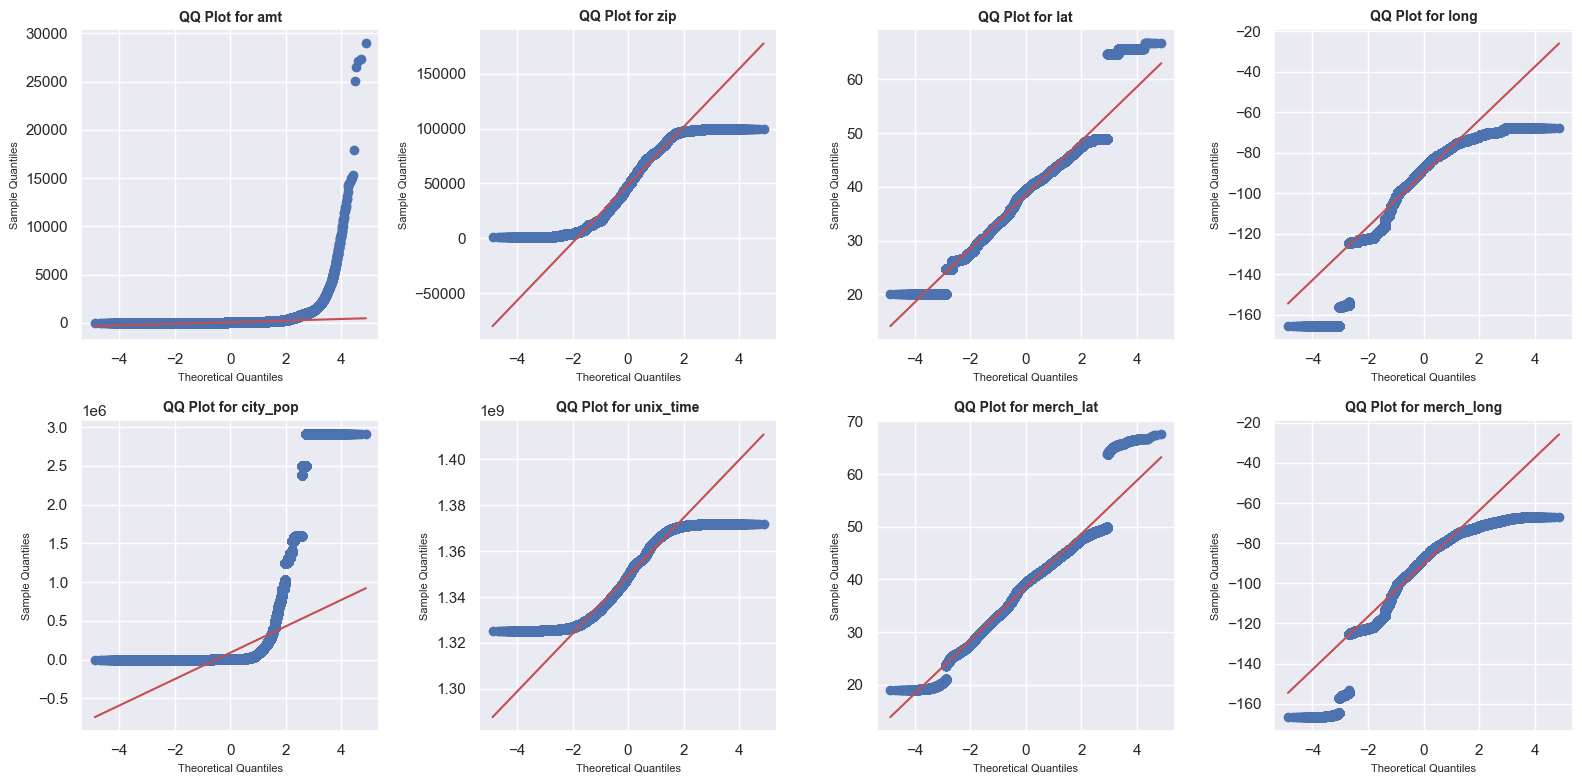

In [12]:
#train_df
sns.set_theme(style="darkgrid")

num_cols = 4  
num_rows = -(-len(numerical_vars_filtered) // num_cols)  

plt.figure(figsize=(num_cols * 4, num_rows * 4))

for i, col in enumerate(numerical_vars_filtered, 1):
    plt.subplot(num_rows, num_cols, i)
    stats.probplot(train_df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {col}', fontsize=10, fontweight='bold')
    plt.xlabel('Theoretical Quantiles', fontsize=8)
    plt.ylabel('Sample Quantiles', fontsize=8)

plt.tight_layout()
plt.show()


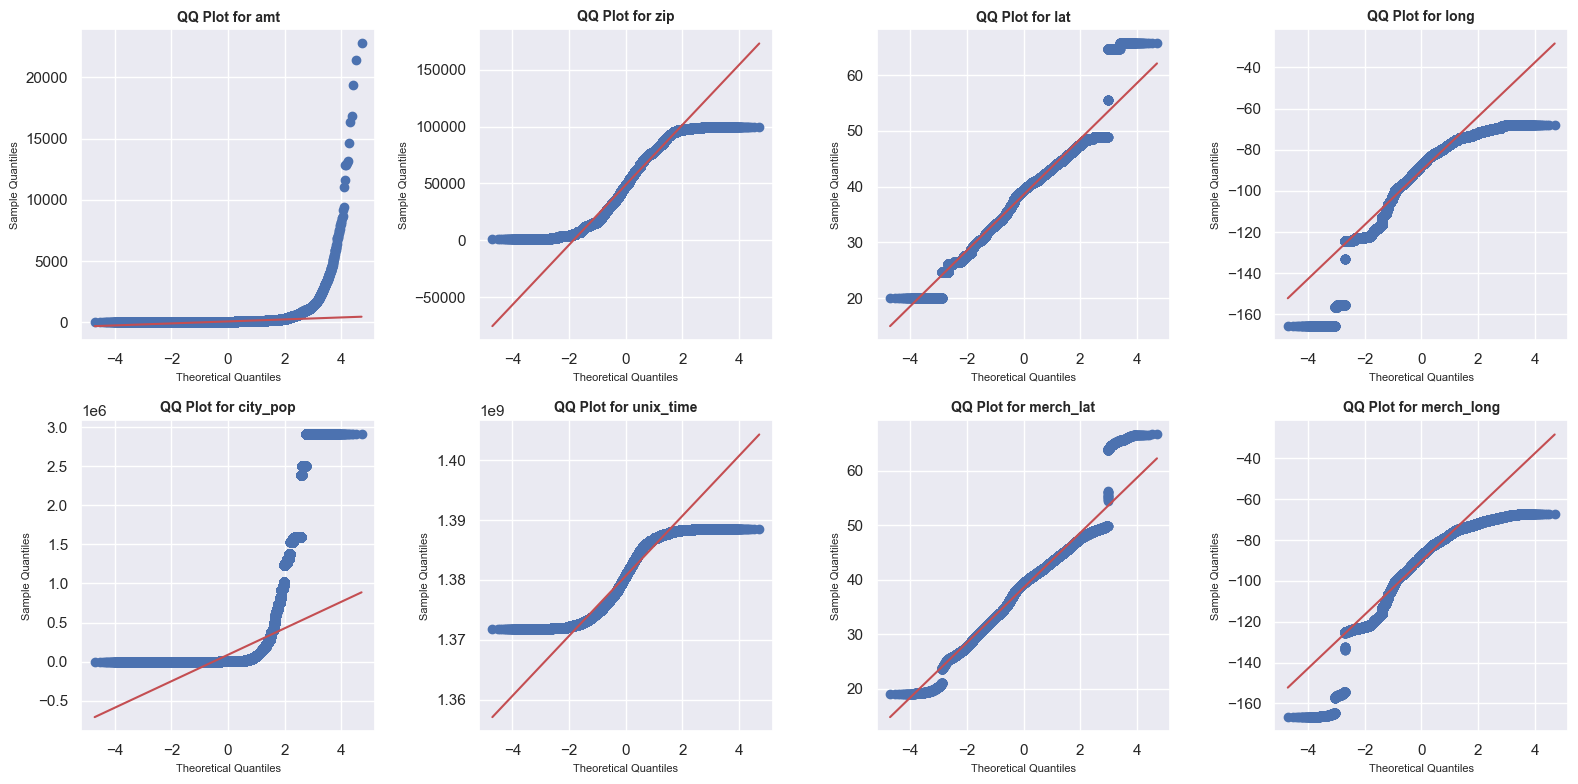

In [13]:
#test_df
sns.set_theme(style="darkgrid")

num_cols = 4  
num_rows = -(-len(numerical_vars_filtered) // num_cols)  

plt.figure(figsize=(num_cols * 4, num_rows * 4))

for i, col in enumerate(numerical_vars_filtered, 1):
    plt.subplot(num_rows, num_cols, i)
    stats.probplot(test_df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {col}', fontsize=10, fontweight='bold')
    plt.xlabel('Theoretical Quantiles', fontsize=8)
    plt.ylabel('Sample Quantiles', fontsize=8)

plt.tight_layout()
plt.show()


### 🔍 For the train and test datasets we can see that the features zip and unix_time follow a normal distribution in contrary to the 6 other features. 

### 📉 Calculate skewness and kurtosis for each variable

In [20]:
results = []
for var in  numerical_vars_filtered:
    skewness = stats.skew(train_df[var])
    kurtosis = stats.kurtosis(train_df[var])
    
    results.append({
        'Feature':  var ,
        'Skewness': skewness,
        'Kurtosis': kurtosis
    })

results_df = pd.DataFrame(results)

display(results_df)

Feature   Skewness     Kurtosis
0         amt  42.277825  4545.627447
1         zip   0.079681    -1.096450
2         lat  -0.186027     0.812960
3        long  -1.150106     1.855881
4    city_pop   5.593847    37.614370
5   unix_time   0.003378    -1.087541
6   merch_lat  -0.181915     0.795986
7  merch_long  -1.146959     1.848467

### Skewness and Kurtosis Analysis

- **Transaction Amount (`amt`)** and **City Population (`city_pop`)** are highly right-skewed with very high kurtosis, indicating extreme outliers and heavy tails. These features likely need transformation (e.g., log or binning) before modeling.  
- **Customer Longitude (`long`)** and **Merchant Longitude (`merch_long`)** are moderately left-skewed with slightly heavy tails, suggesting minor outliers may exist.  
- **Customer Latitude (`lat`)** and **Merchant Latitude (`merch_lat`)** are roughly symmetric with mild kurtosis, indicating fairly normal distributions.  
- **Postal Code (`zip`)** and **Transaction Time (`unix_time`)** have near-zero skewness and low kurtosis, meaning they are symmetric.

## 🔬 Bivariate Analysis

### 📈 Scatter plot to detect relationships, trends and anomalies between two numerical variables

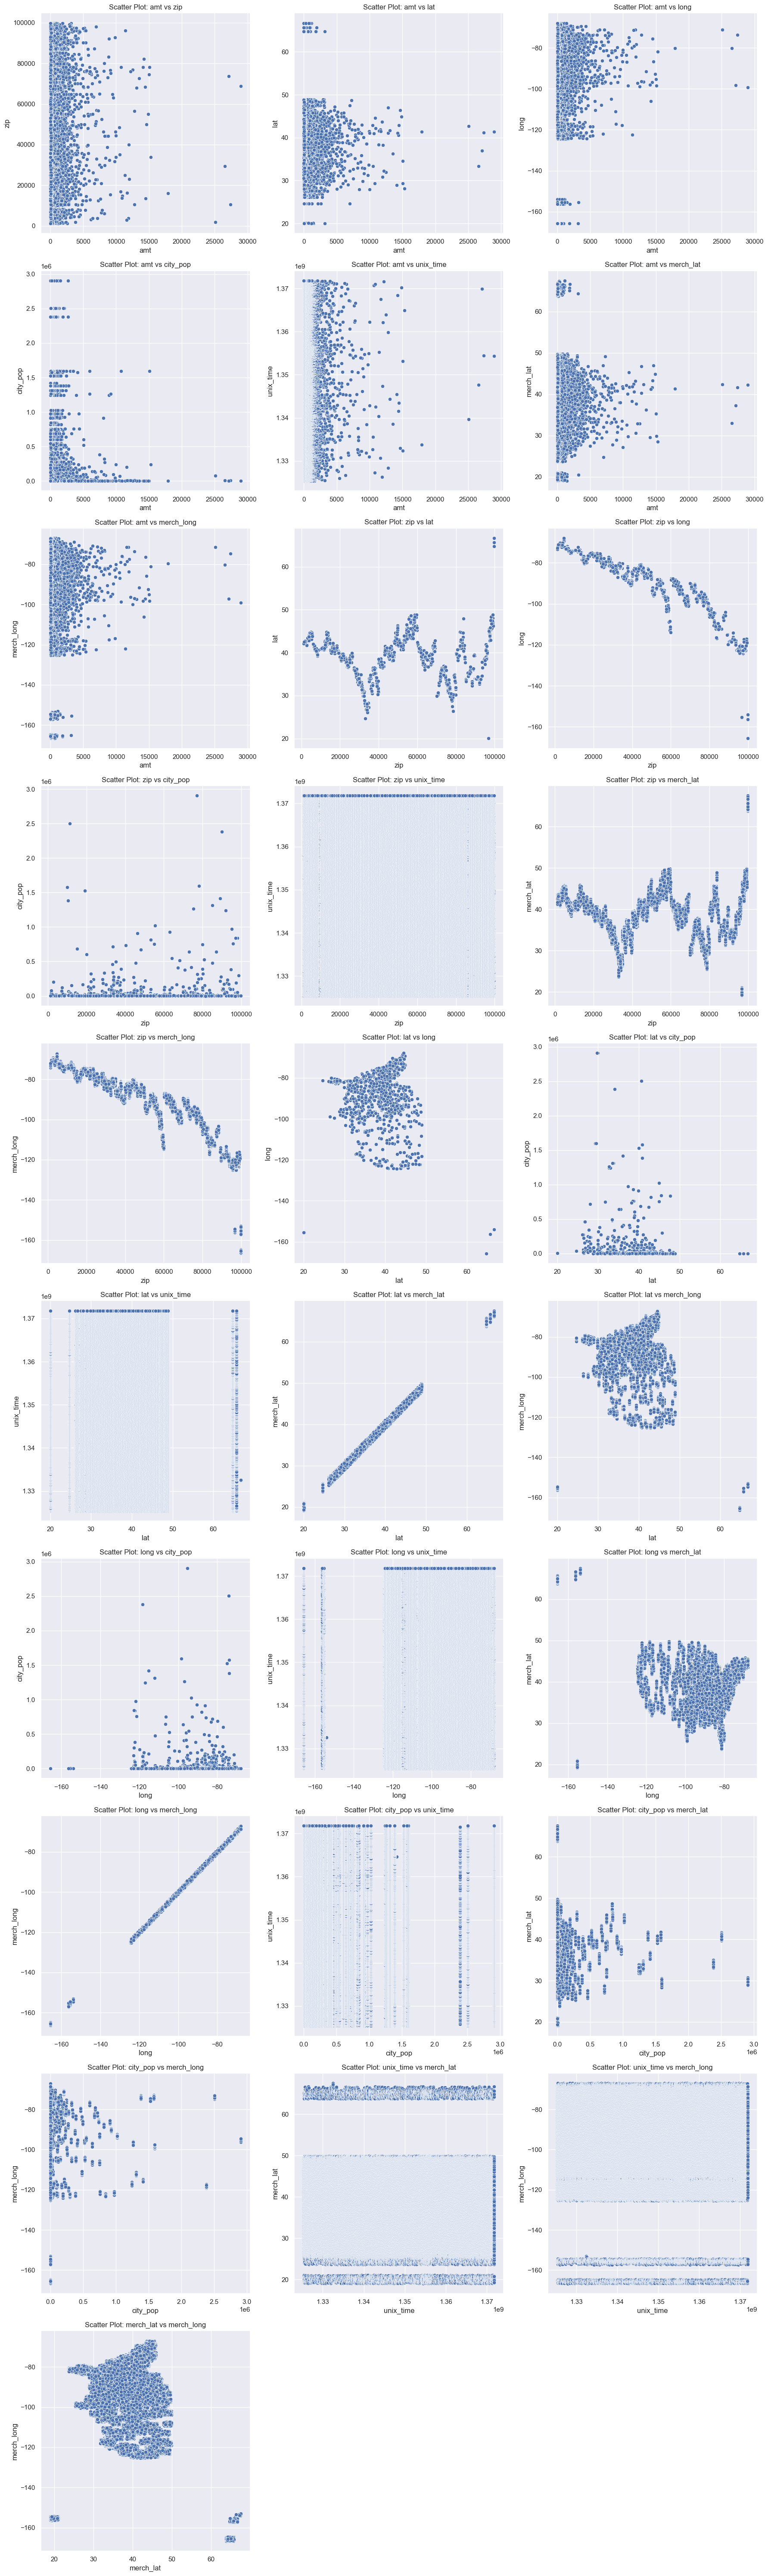

In [18]:
pairs = list(itertools.combinations(numerical_vars_filtered, 2))

fig, axes = plt.subplots(nrows=(len(pairs) // 3) + 1, ncols=3, figsize=(18, 6 * ((len(pairs) // 3) + 1)))
axes = axes.flatten()

for i, (col1, col2) in enumerate(pairs):
    sns.scatterplot(data=train_df, x=col1, y=col2, ax=axes[i])
    axes[i].set_title(f"Scatter Plot: {col1} vs {col2}")
    axes[i].set_xlabel(col1)
    axes[i].set_ylabel(col2)


for i in range(len(pairs), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### 🔗 Correlation matrix to see strength and direction of the relationship between variables

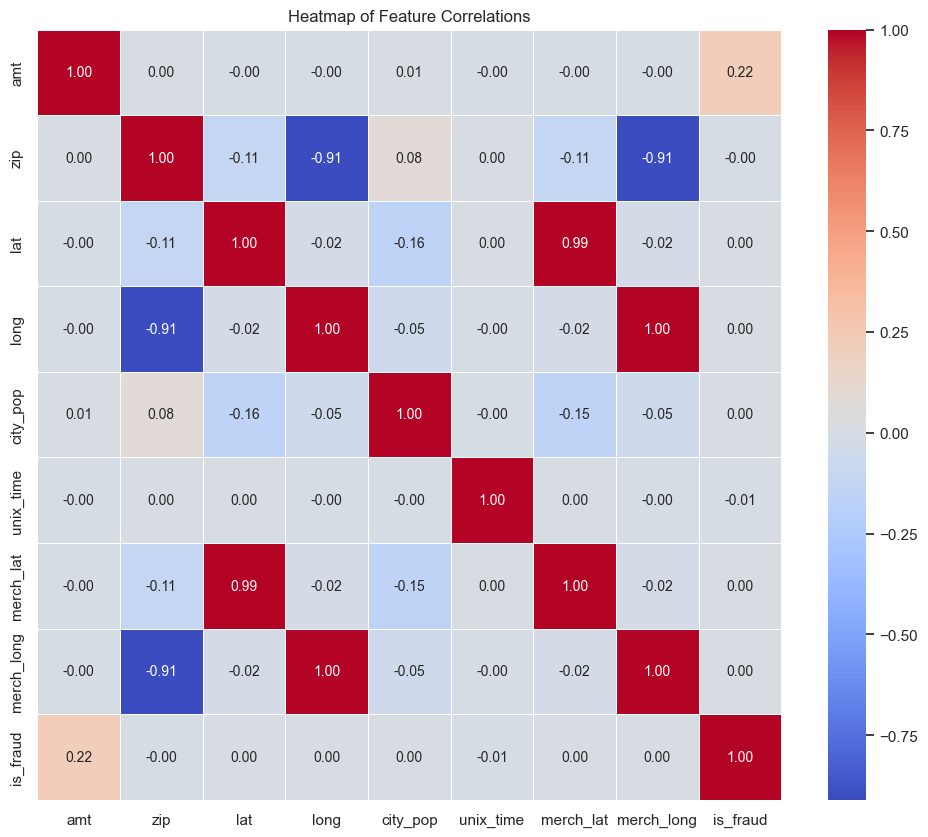

These features are positively correlated (>|0.9|):
lat and merch_lat: 0.99
long and merch_long: 1.00
merch_lat and lat: 0.99
merch_long and long: 1.00

These features are negatively correlated (<-0.9):
zip and long: -0.91
zip and merch_long: -0.91
long and zip: -0.91
merch_long and zip: -0.91


In [23]:
numeric_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features = [col for col in numeric_features if col not in ['cc_num']]

corr_matrix = train_df[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 10})
plt.title("Heatmap of Feature Correlations")
plt.show()

positive_corr = []
negative_corr = []

for row in corr_matrix.columns:
    for col in corr_matrix.columns:
        if row != col:
            if corr_matrix.loc[row, col] > 0.9:
                positive_corr.append((row, col, corr_matrix.loc[row, col]))
            elif corr_matrix.loc[row, col] < -0.9:
                negative_corr.append((row, col, corr_matrix.loc[row, col]))

if positive_corr:
    print("These features are positively correlated (>|0.9|):")
    for pair in positive_corr:
        print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")
else:
    print("No positive correlations (>|0.9|) found.")

if negative_corr:
    print("\nThese features are negatively correlated (<-0.9):")
    for pair in negative_corr:
        print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")
else:
    print("No negative correlations (<-0.9) found.")

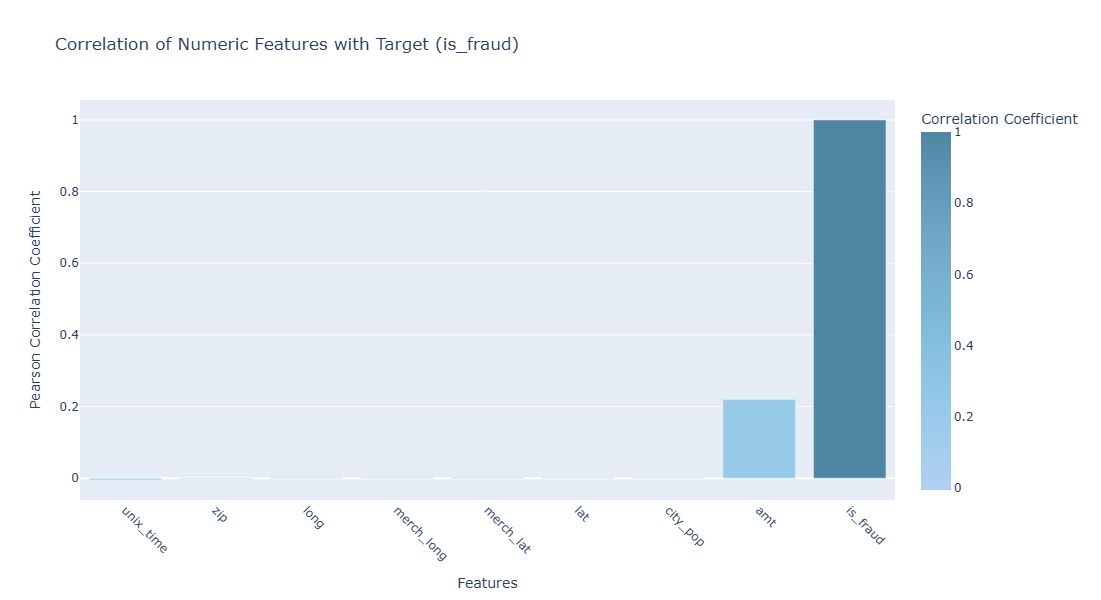

In [26]:
numeric_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features = [col for col in numeric_features if col != 'cc_num']

# Compute correlation with target
target_col = 'is_fraud'
features_for_corr = numeric_features.copy()
if target_col not in features_for_corr:
    features_for_corr.append(target_col)

correlation_with_target = train_df[features_for_corr].corr()[target_col].sort_values()

# Interactive bar chart
pastel_blue_colors = ['#b0d0f3', '#93c9e6', '#7cb9d4', '#6ca3c1', '#4f87a3']

fig = px.bar(
    x=correlation_with_target.index,
    y=correlation_with_target.values,
    labels={"x": "Features", "y": "Pearson Correlation Coefficient"},
    title=f"Correlation of Numeric Features with Target ({target_col})",
    color=correlation_with_target.values,
    color_continuous_scale=pastel_blue_colors
)

fig.update_layout(
    xaxis=dict(title="Features", tickangle=45),
    yaxis=dict(title="Pearson Correlation Coefficient"),
    coloraxis_colorbar=dict(title="Correlation Coefficient"),
    height=600,
    width=1000
)

fig.show()